# Import Libraries

In [164]:
import random
import numpy as np
import pandas as pd
import scipy
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import copy
import logging
import missingno
from collections import Counter
import pickle
from category_encoders import TargetEncoder, BinaryEncoder
from imblearn.over_sampling import (
    SMOTE,
    RandomOverSampler,
    SVMSMOTE,
    BorderlineSMOTE,
    ADASYN,
    SMOTEN,
    SMOTENC
)
from imblearn.under_sampling import (
    TomekLinks, 
    RandomUnderSampler,
    EditedNearestNeighbours, 
    RepeatedEditedNearestNeighbours, 
    AllKNN, 
    CondensedNearestNeighbour, 
    ClusterCentroids, 
    NearMiss
)
from sklearn.model_selection import (
    LeaveOneOut,
    LeavePOut,
    RepeatedKFold,
    StratifiedKFold,
    TimeSeriesSplit,
    train_test_split,
    GridSearchCV,
    RandomizedSearchCV,
    cross_val_score,
    learning_curve,
    KFold
)
from sklearn.preprocessing import (
    LabelEncoder,
    OrdinalEncoder,
    StandardScaler,
    MinMaxScaler,
    RobustScaler,
    LabelBinarizer, 
    MultiLabelBinarizer,
    MaxAbsScaler,
    QuantileTransformer,
    PowerTransformer,
    Normalizer
)
from sklearn.feature_extraction import (
    DictVectorizer, 
    FeatureHasher
)
from sklearn.linear_model import (
    Ridge,
    Lasso,
    ElasticNet,
    BayesianRidge
)
from sklearn.feature_selection import (
    SelectKBest, 
    SelectFpr, 
    SelectFdr, 
    SelectFwe, 
    SelectPercentile, 
    GenericUnivariateSelect, 
    VarianceThreshold, 
    RFE, 
    RFECV, 
    SequentialFeatureSelector, 
    SelectFromModel, 
    f_regression, 
    chi2, 
    f_classif, 
    mutual_info_classif, 
    mutual_info_regression
)
from sklearn.neighbors import NearestNeighbors
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (
    RandomForestRegressor,
    BaggingRegressor,
    AdaBoostRegressor,
    GradientBoostingRegressor,
    StackingRegressor
)
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor, StackingRegressor
from lightgbm import LGBMRegressor, early_stopping
from catboost import CatBoostRegressor

from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score
)
from tpot import TPOTRegressor
from mlxtend.feature_selection import ExhaustiveFeatureSelector
from sklearn.decomposition import (
    PCA, 
    FactorAnalysis, 
    TruncatedSVD, 
    FastICA, 
    KernelPCA
)
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.manifold import TSNE
import umap.umap_ as umap
from tensorflow.keras.layers import Input, Dense  # type: ignore
from tensorflow.keras.models import Model  # type: ignore
import os
os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'

from scipy.stats import uniform, randint
from fast_ml.model_development import train_valid_test_split
from typing import (
    Any,
    Literal,
    Union,
    List,
    Optional,
    Dict,
    Tuple
)


logging.basicConfig(level=logging.INFO)

# Call_def

In [2]:
from ML_def import (
    read_data,
    columns_info,
    not_useful_columns,
    convert_to_numeric,
    target_last_col,
    
    remove_missing_rows,
    fill_missing_values_dataFrame,
    fill_missing_values_column,
    
    check_outliers_IQR,
    check_outliers_zscore,
    plot_outliers_boxplot,
    box_plot_all_columns,
    plot_outliers_scatterplot_IQR,
    plot_outliers_scatterplot_zscore,
    handle_outliers_IQR,
    handle_outliers_zscore,
    
    calculate_skewness,
    handle_skewness,
    
    get_columns_with_2_unique_values,
    analyze_null_columns,
    
    check_Balance_Regression,
    over_under_sampling_regression,
    
    rate_by_group,
    plot_groupby,
    plot_pivot,
    plot_pivot_2,
    plot_groupby_and_pivot,
    
    calculate_correlation,
    Heatmap_Correlation,
    
    create_custom_scatter_plot,
    plot_histograms,
    
    feature_selection,
    
    encode_column,
    
    get_x_y,
    get_x_y_TVT,
    get_x_y_TVT_shape,
    validate_test_data_categorical_columns,
    
    scale_data,
    
    dimensionality_reduction,
    
    get_cross_validator,
    grid_search_regression,
    random_search_regression,
    get_regression,
    plot_feature_importance,
    check_overfitting_regression,
    evaluate_model_regression,
    plots_evaluate_models_regression,
    plot_model_performance,
)

# call_visualization_def

In [3]:
from ML_visualization import (
    plot_line,
    plot_line_matplotlib,
    plot_line_all_column,
    plot_line_seaborn,
    plot_line_plotly,
    scatter_plot_matplotlib,
    scatter_plot_seaborn,
    scatter_plot_plotly,
    reg_plot,
    resid_plot,
    bar_plot_matplotlib,
    bar_plot_seaborn,
    bar_plot_all_column,
    bar_plot_plotly,
    multiple_bar_plot_matplotlib,
    multiple_bar_plots_seaborn,
    multiple_bar_plots_plotly,
    cat_plot,
    cat_plot_all_column,
    facet_grid_seaborn,
    pie_chart,
    pie_chart_plotly,
    plot_single_histogram_matplotlib,
    plot_histograms_matplotlib,
    plot_single_histogram_seaborn,
    plot_histograms_seaborn,
    plot_histograms_plotly,
    kde_plot,
    kde_plot_all_column,
    count_plot,
    count_plot_all_column,
    count_plot_plotly,
    box_plot_matplotlib,
    box_plot_seaborn,
    box_plot_plotly,
    box_plot_all_column,
    heatmap_plot,
    heatmap_plot_plotly,
    pair_plot,
    pair_plot_plotly,
    violin_plot,
    violin_plot_plotly,
    plot_violin_all_column,
    joint_plot,
    plot_parallel_coordinates,
    plot_contour,
    plot_tricontourf,
    custom_plot
)

# Read_Data

In [4]:
df = read_data(r'Housing.csv')
true_original_df = copy.deepcopy(df)
print(df.shape)
df.head()

the DataFrame dont have any duplicates row
Data read successfully from Housing.csv
(545, 13)


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [5]:
target_column = 'price'

In [6]:
# Make the target is last column
df = target_last_col(df,target_column)

# Get Information of Data

In [7]:
df_columns = df.columns.to_list()
print(df_columns)

['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus', 'price']


In [8]:
columns_info(df)

,names,dtypes,unique,n_unique,number_of_rows,number_of_null
0,area,int64,"[7420, 8960, 9960, 7500, 8580, 16200, 8100, 57...",284,545,0
1,bedrooms,int64,"[4, 3, 5, 2, 6, 1]",6,545,0
2,bathrooms,int64,"[2, 4, 1, 3]",4,545,0
3,stories,int64,"[3, 4, 2, 1]",4,545,0
4,mainroad,object,"[yes, no]",2,545,0
5,guestroom,object,"[no, yes]",2,545,0
6,basement,object,"[no, yes]",2,545,0
7,hotwaterheating,object,"[no, yes]",2,545,0
8,airconditioning,object,"[yes, no]",2,545,0
9,parking,int64,"[2, 3, 0, 1]",4,545,0


# drop not useful columns

#### list of columns

In [9]:
# not_useful_columns_name = ['CustomerID', 'Count', 'Country', 'State', 'Churn Label', 'Churn Reason']
# not_useful_columns(df=df, column_name=not_useful_columns_name)

#### single column

In [10]:
# not_useful_columns(df=df, column_name="Lat Long")

# change the dtype of the column from object to numeric

#### list of columns

In [11]:
# convert_to_numeric_columns_name = ['Total Charges']
# convert_to_numeric(df=df, column_name=convert_to_numeric_columns_name)

#### single column

In [12]:
# convert_to_numeric(df=df, column_name='Total Charges')

# take copy for Visualization

In [13]:
original_df = copy.deepcopy(df)
original_df.head(3)

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price
0,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished,13300000
1,8960,4,4,4,yes,no,no,no,yes,3,no,furnished,12250000
2,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished,12250000


# Describe numerical column and his information

In [14]:
Describe_numerical_column = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(Describe_numerical_column)

['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'price']


In [15]:
df.describe()

,area,bedrooms,bathrooms,stories,parking,price
count,545.000000,545.000000,545.000000,545.000000,545.000000,5.450000e+02
mean,5150.541284,2.965138,1.286239,1.805505,0.693578,4.766729e+06
std,2170.141023,0.738064,0.502470,0.867492,0.861586,1.870440e+06
min,1650.000000,1.000000,1.000000,1.000000,0.000000,1.750000e+06
25%,3600.000000,2.000000,1.000000,1.000000,0.000000,3.430000e+06
50%,4600.000000,3.000000,1.000000,2.000000,0.000000,4.340000e+06
75%,6360.000000,3.000000,2.000000,2.000000,1.000000,5.740000e+06
max,16200.000000,6.000000,4.000000,4.000000,3.000000,1.330000e+07


# Describe object column and his information

In [16]:
Describe_object_column =df.select_dtypes(exclude=['int64', 'float64']).columns.tolist()
print(Describe_object_column)

['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']


In [17]:
df.describe(include=['object'])

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
count,545,545,545,545,545,545,545
unique,2,2,2,2,2,2,3
top,yes,no,no,no,no,no,semi-furnished
freq,468,448,354,520,373,417,227


# Data Encoding columns with 2 unique values

In [18]:
get_columns_with_2_unique_values(df)

The list: ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea'] unique values: ('no', 'yes')


In [19]:
columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
df = encode_column(df, columns = columns, method='binary', binary_1='Yes', binary_0='No')

Encoder for 'mainroad' saved as 'mainroad_BE.pkl' in 'pickle/' folder.
Encoder for 'guestroom' saved as 'guestroom_BE.pkl' in 'pickle/' folder.
Encoder for 'basement' saved as 'basement_BE.pkl' in 'pickle/' folder.
Encoder for 'hotwaterheating' saved as 'hotwaterheating_BE.pkl' in 'pickle/' folder.
Encoder for 'airconditioning' saved as 'airconditioning_BE.pkl' in 'pickle/' folder.
Encoder for 'prefarea' saved as 'prefarea_BE.pkl' in 'pickle/' folder.


In [20]:
# columns = ['Gender']
# df = encode_column(df, columns = columns, method='binary', binary_1='Known', binary_0='Unknown')

In [21]:
# if the target column not binary
# columns = [target_column]
# true_original_df = encode_column(true_original_df, columns = columns, method='binary', binary_1='Yes', binary_0='No')

In [22]:
df.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price
0,7420,4,2,3,1,1,1,1,1,2,1,furnished,13300000
1,8960,4,4,4,1,1,1,1,1,3,0,furnished,12250000
2,9960,3,2,2,1,1,0,1,0,2,1,semi-furnished,12250000
3,7500,4,2,2,1,1,0,1,1,3,1,furnished,12215000
4,7420,4,1,2,1,0,0,1,1,2,0,furnished,11410000


# check columns have nulls

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   area              545 non-null    int64 
 1   bedrooms          545 non-null    int64 
 2   bathrooms         545 non-null    int64 
 3   stories           545 non-null    int64 
 4   mainroad          545 non-null    int64 
 5   guestroom         545 non-null    int64 
 6   basement          545 non-null    int64 
 7   hotwaterheating   545 non-null    int64 
 8   airconditioning   545 non-null    int64 
 9   parking           545 non-null    int64 
 10  prefarea          545 non-null    int64 
 11  furnishingstatus  545 non-null    object
 12  price             545 non-null    int64 
dtypes: int64(12), object(1)
memory usage: 55.5+ KB


In [24]:
null_columns = analyze_null_columns(df)
null_columns

The columns dtype is object: []
The columns dtype is numerical: []


,Column,Null Count,Type


## Identify columns with missing values

In [25]:
# Identify columns with missing values
missing_columns = df.columns[df.isnull().any()].tolist()
print("Columns with missing values: \n" , missing_columns)

Columns with missing values: 
 []


# Removing Rows with Missing Values

#### list of columns

In [26]:
# remove_rows_column_name = ['Total Charges', '', '']
# remove_missing_rows(df=df, column_name=remove_rows_column_name)

#### single column

In [27]:
# remove_missing_rows(df=df, column_name='Total Charges')

#### from all DataFrame

In [28]:
# remove_missing_rows(df=df)

## check columns with missing values

In [29]:
# # Identify columns with missing values
# missing_columns = df.columns[df.isnull().any()].tolist()
# print("Columns with missing values: \n" , missing_columns)

# Filling Missing Values

### Filling Missing Values for all DataFrame

In [30]:
# df = fill_missing_values_dataFrame(df, model='KNNImputer', n_neighbors=3)

### Filling Missing Values for column

#### list of columns

In [31]:
# fill_missing_columns = ['', '', '']
# df = fill_missing_values_column(df, columns=fill_missing_columns, model='KNNImputer', n_neighbors=3)

#### single column

In [32]:
# df = fill_missing_values_column(df, columns='Total Charges', model='KNNImputer', n_neighbors=3)

### check columns with missing values

In [33]:
# Identify columns with missing values
missing_columns = df.columns[df.isnull().any()].tolist()
print("Columns with missing values: \n" , missing_columns)

Columns with missing values: 
 []


# check outliers

## check outliers and skew with box plot

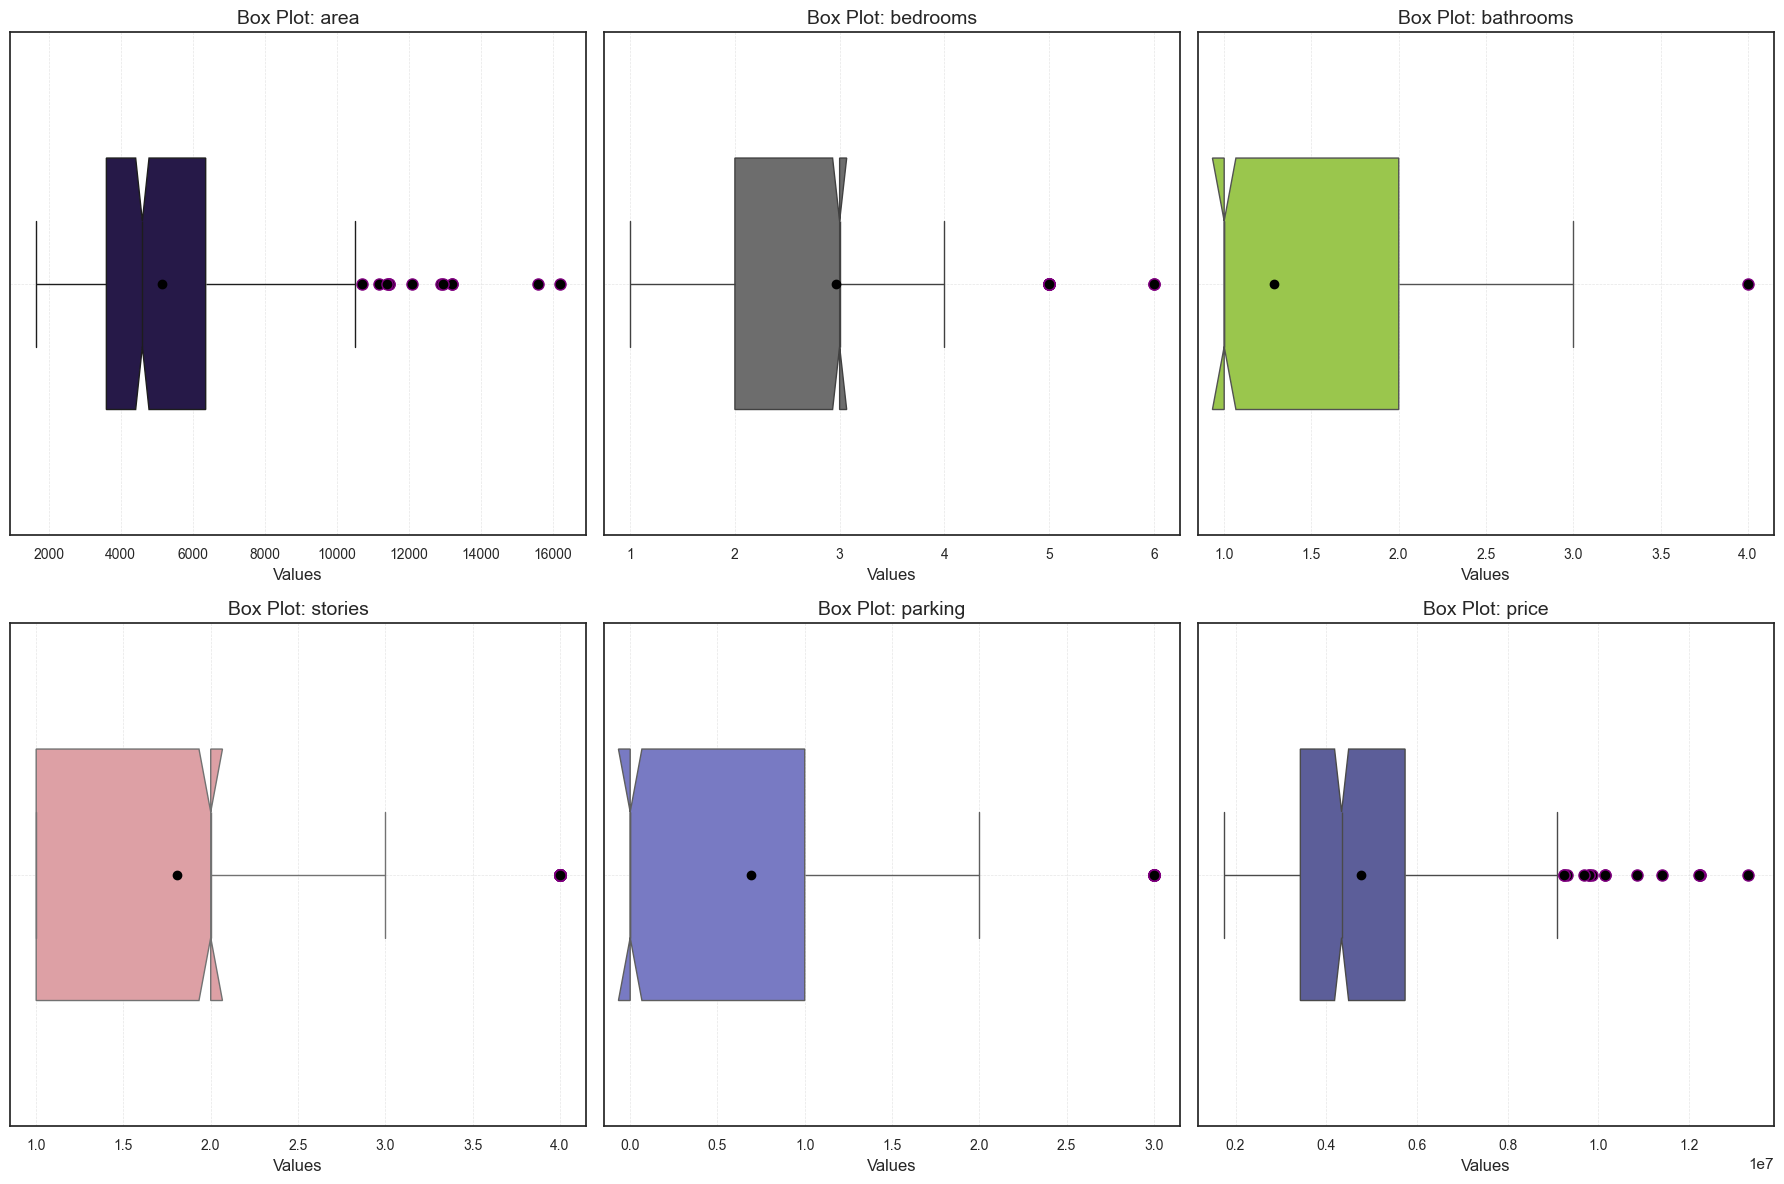

In [34]:
box_plot_all_columns(df, subplot_row = 3, figsize=(18, 12))

## check outliers IQR

### Numbers

In [35]:
outliers_df, outlier_counts = check_outliers_IQR(df)

Number of outliers in each column (IQR method):
area: 12
bedrooms: 12
bathrooms: 1
stories: 41
parking: 12
price: 15

Columns with outliers: ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'price']


### Scatter Plot

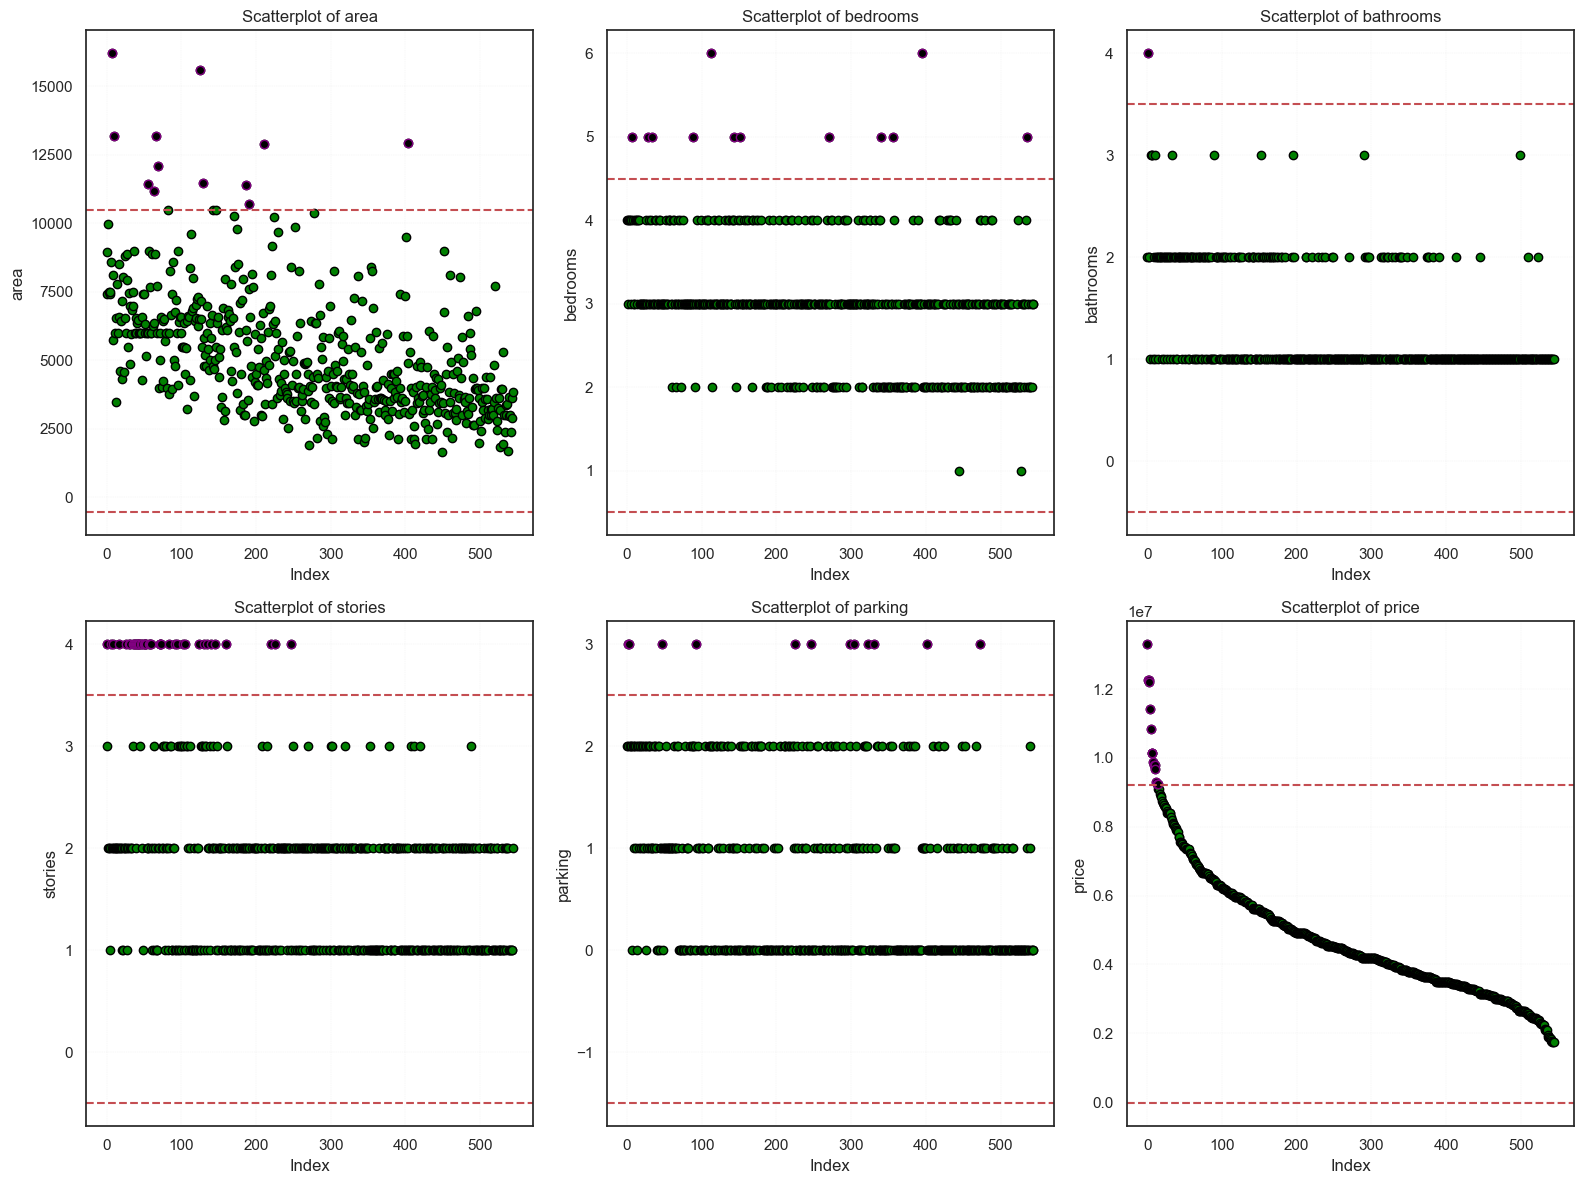

In [36]:
plot_outliers_scatterplot_IQR(original_df, outlier_counts)

## Handle Outliers IQR

In [37]:
outliers_column = []

# df = handle_outliers_IQR(df, outliers_column, method='cap')

# df = handle_outliers_IQR(df, outliers_column, method='remove')
# df = handle_outliers_IQR(df, outliers_column, method='impute', imputation_method='mean')
# df = handle_outliers_IQR(df, outliers_column, method='transform', transformation_method='boxcox')

In [38]:
outliers_df, outlier_counts = check_outliers_IQR(df)

Number of outliers in each column (IQR method):
area: 12
bedrooms: 12
bathrooms: 1
stories: 41
parking: 12
price: 15

Columns with outliers: ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'price']


## check outliers Z-Score

### Numbers

In [39]:
numeric_df, z_scores, outlier_counts_zscore = check_outliers_zscore(df)

Number of outliers in each column (Z-score method):
area: 7
bedrooms: 2
bathrooms: 11
stories: 0
parking: 0
price: 6

Columns with outliers: ['area', 'bedrooms', 'bathrooms', 'price']


### Scatter Plot

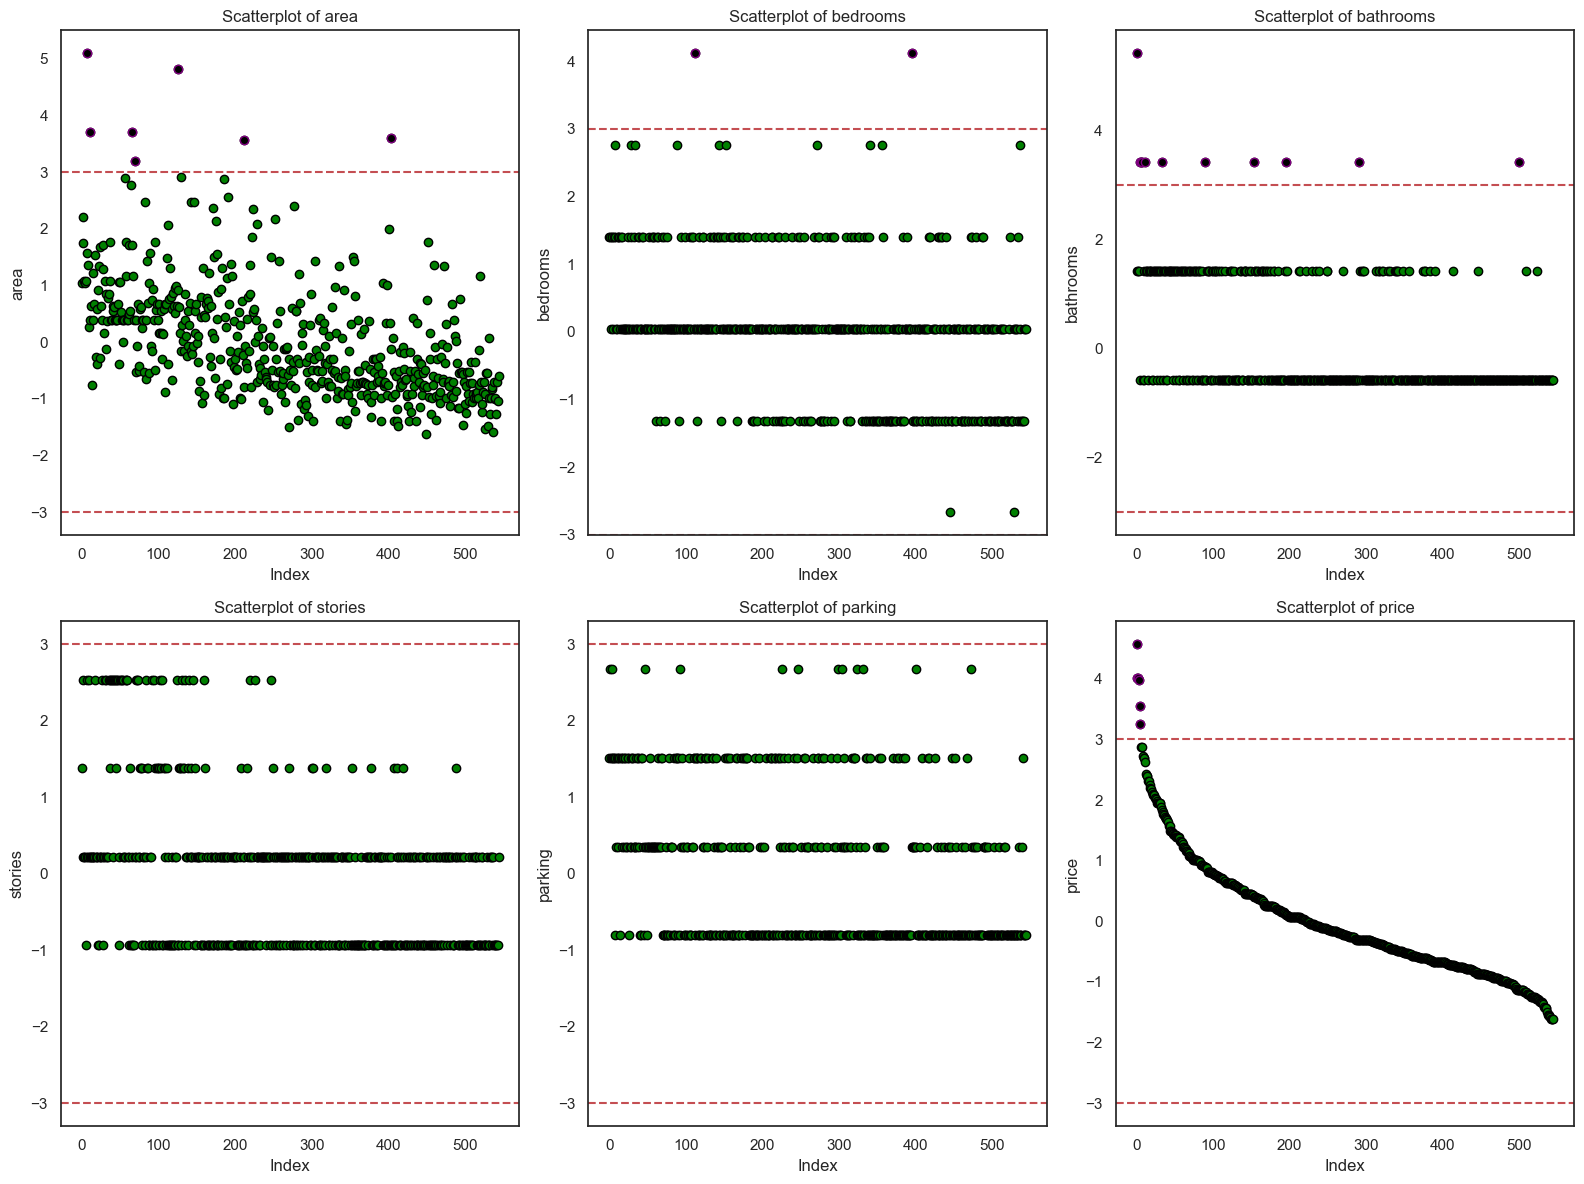

In [40]:
plot_outliers_scatterplot_zscore(z_scores, outlier_counts_zscore)

## Handle Outliers Z-Score

In [41]:
outliers_column = []

# df = handle_outliers_zscore(df, outliers_column, method='cap')

# df = handle_outliers_zscore(df, outliers_column, method='remove')
# df = handle_outliers_zscore(df, outliers_column, method='impute', imputation_method='mean')
# df = handle_outliers_zscore(df, outliers_column, method='transform', transformation_method='boxcox')

In [42]:
numeric_df, z_scores, outlier_counts_zscore = check_outliers_zscore(df)

Number of outliers in each column (Z-score method):
area: 7
bedrooms: 2
bathrooms: 11
stories: 0
parking: 0
price: 6

Columns with outliers: ['area', 'bedrooms', 'bathrooms', 'price']


# skew

In [43]:
# columns_right_skewed, columns_left_skewed = calculate_skewness(df)

In [44]:
# plot_histograms(df,column=None, bins=30, single_histogram_figsize = (20, 20), all_histograms_figsize = (20, 20))

In [45]:
# skewness_columns = ['Latitude', 'Tenure Months', 'Total Charges', 'Zip Code', 'Monthly Charges', 'CLTV']
# skewness_columns_second = ['Tenure Months', 'Monthly Charges', 'Total Charges', 'CLTV']

# df = handle_skewness(df, skewness_columns, method='yeo_johnson')
# df = handle_skewness(df, skewness_columns_second, method='robust_scale')
# df = handle_skewness(df, skewness_columns, method='yeo_johnson')


In [46]:
# columns_right_skewed, columns_left_skewed = calculate_skewness(df)

In [47]:
# plot_histograms(df,column=None, bins=30, single_histogram_figsize = (20, 20), all_histograms_figsize = (20, 20))

## check outliers and skew with box plot

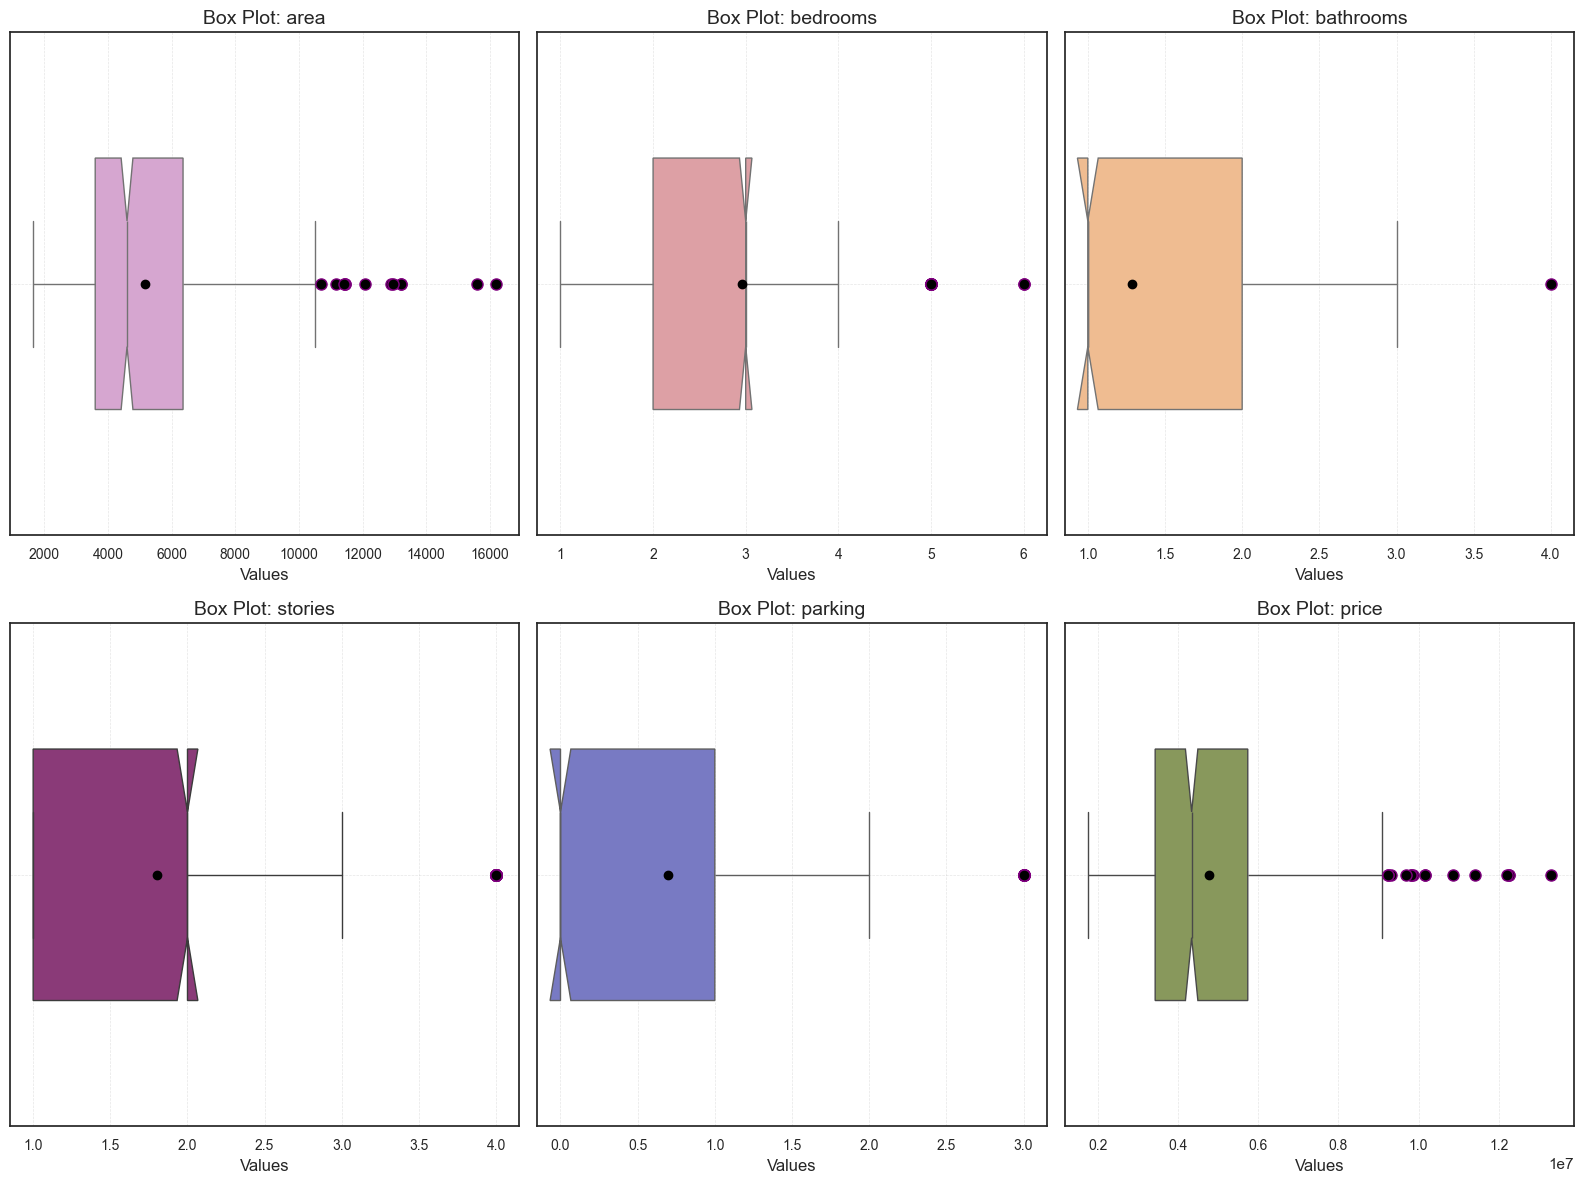

In [48]:
box_plot_all_columns(df, subplot_row = 3, figsize=(16, 12))

# Check the unbalance data

INFO:root:Binning the data for column: price into 8 bins
INFO:root:Creating count plot for binned data of column: price


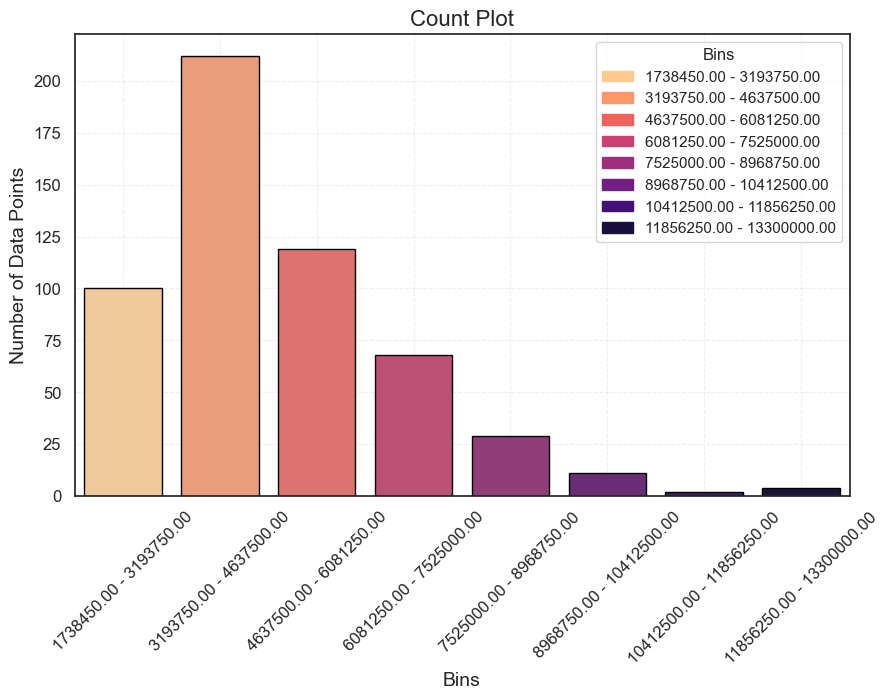

In [49]:
check_Balance_Regression(df, column_plot=target_column, div_number=8)

# Visualization

## info from the data

In [50]:
# age_Exited_rates = rate_by_group(true_original_df, 'MaritalStatus', 'Churn', 'CustomerID', positive_class=1, threshold=4)

In [51]:
# NumOfProducts_Exited_rates = rate_by_group(true_original_df, 'PrizmCode', 'Churn', 'CustomerID', positive_class=1)

In [52]:
# Geography_Exited_rates = rate_by_group(true_original_df, 'CreditRating', 'Churn', 'CustomerID', positive_class=1)

In [53]:
# Tenure_Exited_rates = rate_by_group(true_original_df, 'RetentionOffersAccepted', 'Churn', 'CustomerID', positive_class=1, threshold=5)

In [54]:
# Tenure_Exited_rates = rate_by_group(true_original_df, 'RetentionCalls', 'Churn', 'CustomerID', positive_class=1, threshold=5)
# Tenure_Exited_rates

## chart

In [55]:
# PaymentMethod_name = df['PrizmCode'].value_counts().index.to_list()
# PaymentMethod_values = df['PrizmCode'].value_counts().values.tolist()
# # pie_chart(labels=PaymentMethod_name, sizes=PaymentMethod_values, title="Payment Methods")
# pie_chart_plotly(labels=PaymentMethod_name, sizes=PaymentMethod_values, title="Prizm Code")


In [56]:
# InternetService_name = df['MaritalStatus'].value_counts().index.to_list()
# InternetService_values = df['MaritalStatus'].value_counts().values.tolist()
# # pie_chart(labels=InternetService_name, sizes=InternetService_values, title="Payment Methods")
# pie_chart_plotly(labels=InternetService_name, sizes=InternetService_values, title="Marital Status")

In [57]:
# Contract_name = original_df['CreditRating'].value_counts().index.to_list()
# Contract_values = original_df['CreditRating'].value_counts().values.tolist()
# # pie_chart(labels=Contract_name, sizes=Contract_values, title="Payment Methods")
# pie_chart_plotly(labels=Contract_name, sizes=Contract_values, title="Credit Rating")

In [58]:
# Contract_name = original_df['RetentionCalls'].value_counts().index.to_list()
# Contract_values = original_df['RetentionCalls'].value_counts().values.tolist()
# # pie_chart(labels=Contract_name, sizes=Contract_values, title="Payment Methods")
# pie_chart_plotly(labels=Contract_name, sizes=Contract_values, title="Retention Calls")

## Multiple bar

HasCreditCard
RetentionCalls
CreditRating

In [59]:
# grouped_data = original_df.groupby(['HasCreditCard', 'Churn']).size().unstack(fill_value=0)

# categories = grouped_data.index.tolist()
# datasets = [grouped_data[col].tolist() for col in grouped_data.columns]
# labels = ['not Churn', 'Churn']

# multiple_bar_plot_matplotlib(categories, datasets, labels=labels, title='HasCreditCard by Churn Status', xlabel='HasCreditCard Type', ylabel='Count')

In [60]:
# grouped_data = original_df.groupby(['RetentionCalls', 'Churn']).size().unstack(fill_value=0)

# categories = grouped_data.index.tolist()
# datasets = [grouped_data[col].tolist() for col in grouped_data.columns]
# labels = ['not Churn', 'Churn']

# multiple_bar_plot_matplotlib(categories, datasets, labels=labels, title='RetentionCalls by Churn Status', xlabel='RetentionCalls Type', ylabel='Count')

In [61]:
# grouped_data = original_df.groupby(['CreditRating', 'Churn']).size().unstack(fill_value=0)

# categories = grouped_data.index.tolist()
# datasets = [grouped_data[col].tolist() for col in grouped_data.columns]
# labels = ['not Churn', 'Churn']

# multiple_bar_plot_matplotlib(categories, datasets, labels=labels, title='CreditRating by Churn Status', xlabel='CreditRating Type', ylabel='Count')

In [62]:
# grouped_data = original_df.groupby(['CreditRating', 'HasCreditCard']).size().unstack(fill_value=0)

# categories = grouped_data.index.tolist()
# datasets = [grouped_data[col].tolist() for col in grouped_data.columns]
# labels = ["Hasn't Credit Card","Has Credit Card"]

# multiple_bar_plot_matplotlib(categories, datasets, labels=labels, title='CreditRating by HasCreditCard Status', xlabel='CreditRating', ylabel='Count')

In [63]:
# grouped_data = original_df.groupby(['RetentionCalls', 'PrizmCode']).size().unstack(fill_value=0)

# categories = grouped_data.index.tolist()
# datasets = [grouped_data[col].tolist() for col in grouped_data.columns]
# labels = ['Other', 'Rural','Suburban', 'Town']

# multiple_bar_plot_matplotlib(categories, datasets, labels=labels, title='NumOfProducts by PrizmCode Status', xlabel='NumOfProducts', ylabel='Count')

## Bar

In [64]:
# column_counts = original_df['ThreewayCalls'].value_counts().reset_index()
# column_counts.columns = ['ThreewayCalls', 'value']

# bar_plot_plotly(df=column_counts, x='ThreewayCalls', y='value', hue='value')

In [65]:
# column_counts = original_df['HasCreditCard'].value_counts().reset_index()
# column_counts.columns = ['HasCreditCard', 'value']

# bar_plot_seaborn(df=column_counts, x='HasCreditCard', y='value',palette='viridis')

In [66]:
# column_counts = original_df['RetentionCalls'].value_counts().reset_index()
# column_counts.columns = ['RetentionCalls', 'value']

# bar_plot_matplotlib(column_counts['RetentionCalls'], column_counts['value'],x_rotation=0)

## count plot

In [67]:
# count_plot(df=original_df , x='RetentionOffersAccepted' , hue='Churn')

In [68]:
# categorical_features=original_df.drop(['ServiceArea'],axis=1).select_dtypes(exclude=['int64', 'float64']).columns.tolist()
# count_plot_all_column(categorical_features, original_df, vision='x', num_of_column=4)

## Violin

In [69]:
# violin_plot(data=original_df, x='TruckOwner', y='MonthlyRevenue', hue='TruckOwner',split=True) #catagorical column in x and numircal in y

In [70]:
# violin_plot(data=original_df, x='HasCreditCard', y='PercChangeRevenues', hue='HasCreditCard') #catagorical column in x and numircal in y

In [71]:
# plot_violin_all_column(df, figsize=(30, 30), n_cols=6)

## Histogram

In [72]:
# plot_single_histogram_seaborn(original_df,x='MonthsInService', bins=50, palette='magma', show=False)
# plt.axvline(np.mean(original_df["MonthsInService"]) , color = "black" , label ="The Mean of the tenure")
# plt.axvline(np.median(original_df["MonthsInService"]) , color = "blue" , label ="The Median of the tenure")
# plt.show()

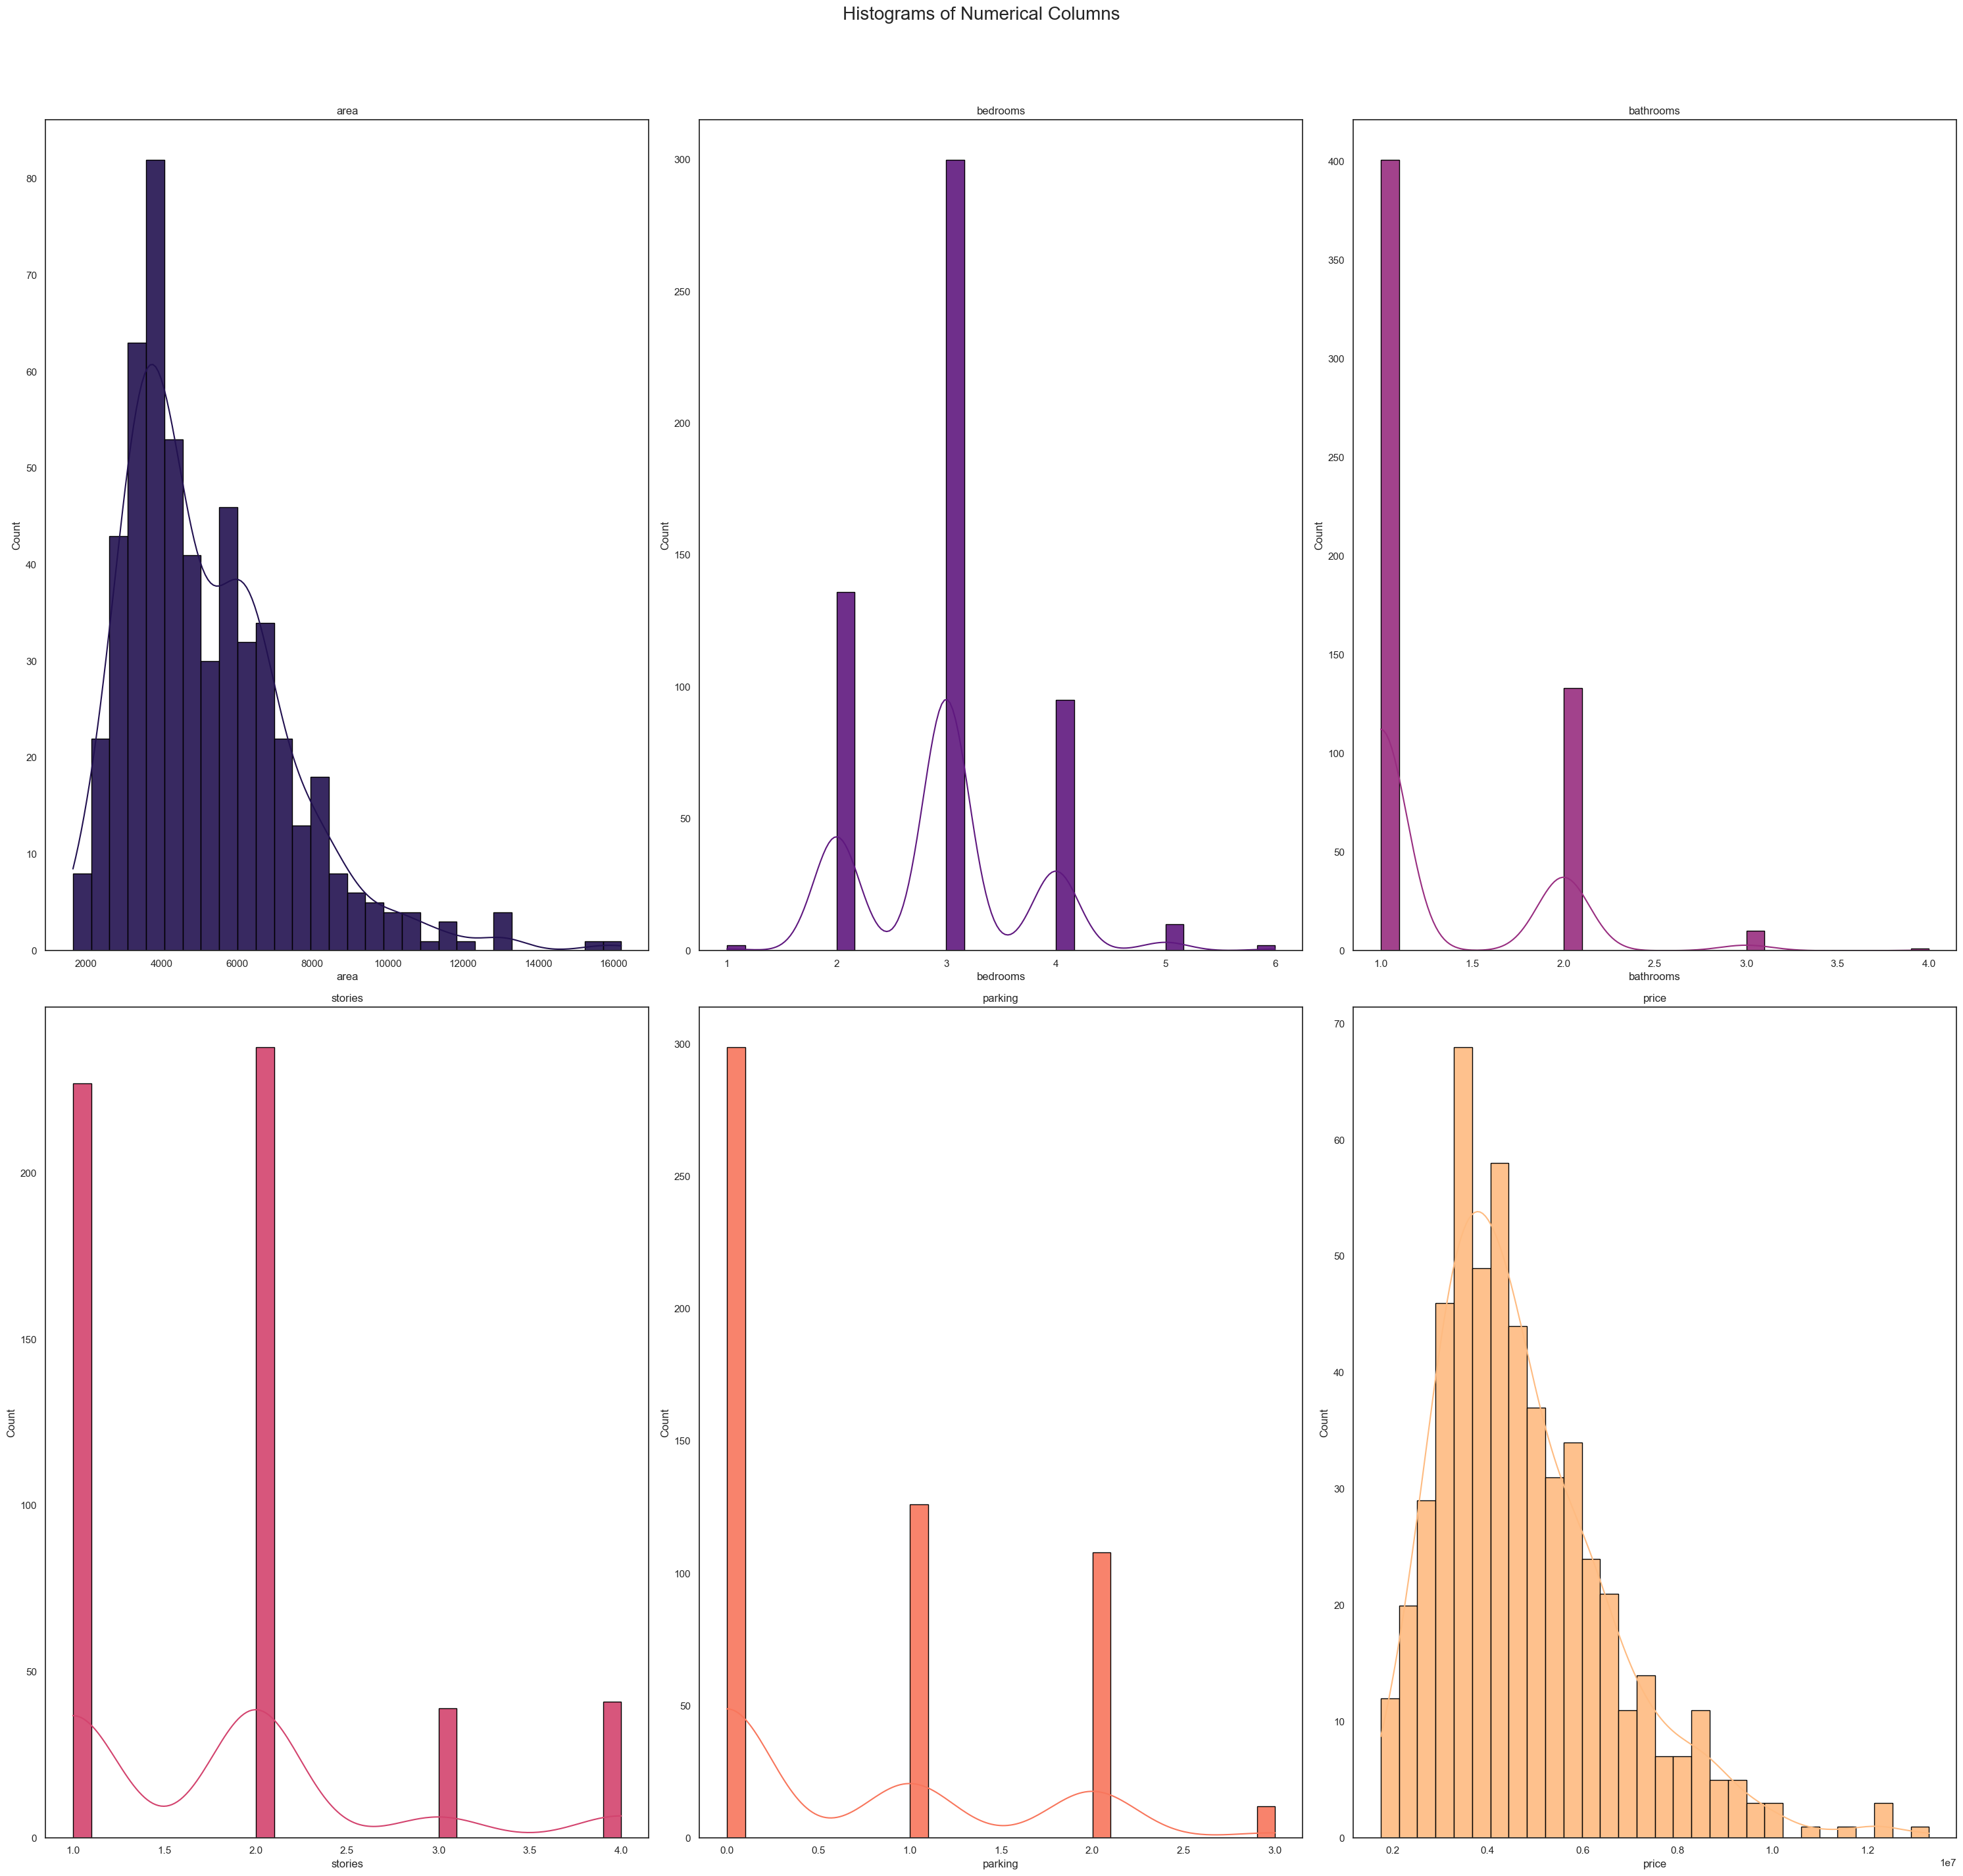

In [73]:
plot_histograms(df,column=None, bins=30, single_histogram_figsize = (20, 20), all_histograms_figsize = (30, 30))

#  Groupby and pivot

### Groupby

In [74]:
# grouped_df = df.groupby('')

### pivot

In [75]:
# pivot_df = df.pivot_table(values='values', index='category', columns='sub_category', aggfunc='mean')

# Correlation Coefficient

## Calculate Correlation

In [76]:
calculate_correlation(df, outcome_column=target_column,num_results=7)

Calculating Pearson correlation coefficients for numeric columns against the outcome column: {outcome_column}
Top 7 results:
           Variable  Pearson Coefficient       P-Value
0              area             0.535997  7.388225e-42
2         bathrooms             0.517545  1.139322e-38
8   airconditioning             0.452954  6.310970e-29
3           stories             0.420712  8.668397e-25
9           parking             0.384394  1.238378e-20
1          bedrooms             0.366494  9.080302e-19
10         prefarea             0.329777  2.718374e-15

area
The Pearson Correlation Coefficient for area is 0.5360 with a P-value of P = 7.388e-42

bathrooms
The Pearson Correlation Coefficient for bathrooms is 0.5175 with a P-value of P = 1.139e-38

airconditioning
The Pearson Correlation Coefficient for airconditioning is 0.4530 with a P-value of P = 6.311e-29

stories
The Pearson Correlation Coefficient for stories is 0.4207 with a P-value of P = 8.668e-25

parking
The Pearson Corr

,Variable,Pearson Coefficient,P-Value
0,area,0.535997,7.388225e-42
2,bathrooms,0.517545,1.139322e-38
8,airconditioning,0.452954,6.310970e-29
3,stories,0.420712,8.668397e-25
9,parking,0.384394,1.238378e-20
1,bedrooms,0.366494,9.080302e-19
10,prefarea,0.329777,2.718374e-15


## Visualize Correlation with Bars

In [77]:
# df_corr = df.corr()[target_column].sort_values(ascending = False)
# df_corr_index = df_corr.index.to_list()
# df_corr_values = df_corr.values.tolist()
# df_corr = pd.DataFrame({'name': df_corr_index, 'values':df_corr_values})
# bar_plot_plotly(df=df_corr, x='name', y='values',hue='values', width=1500, height=650)

## Visualize Correlation with Heatmap

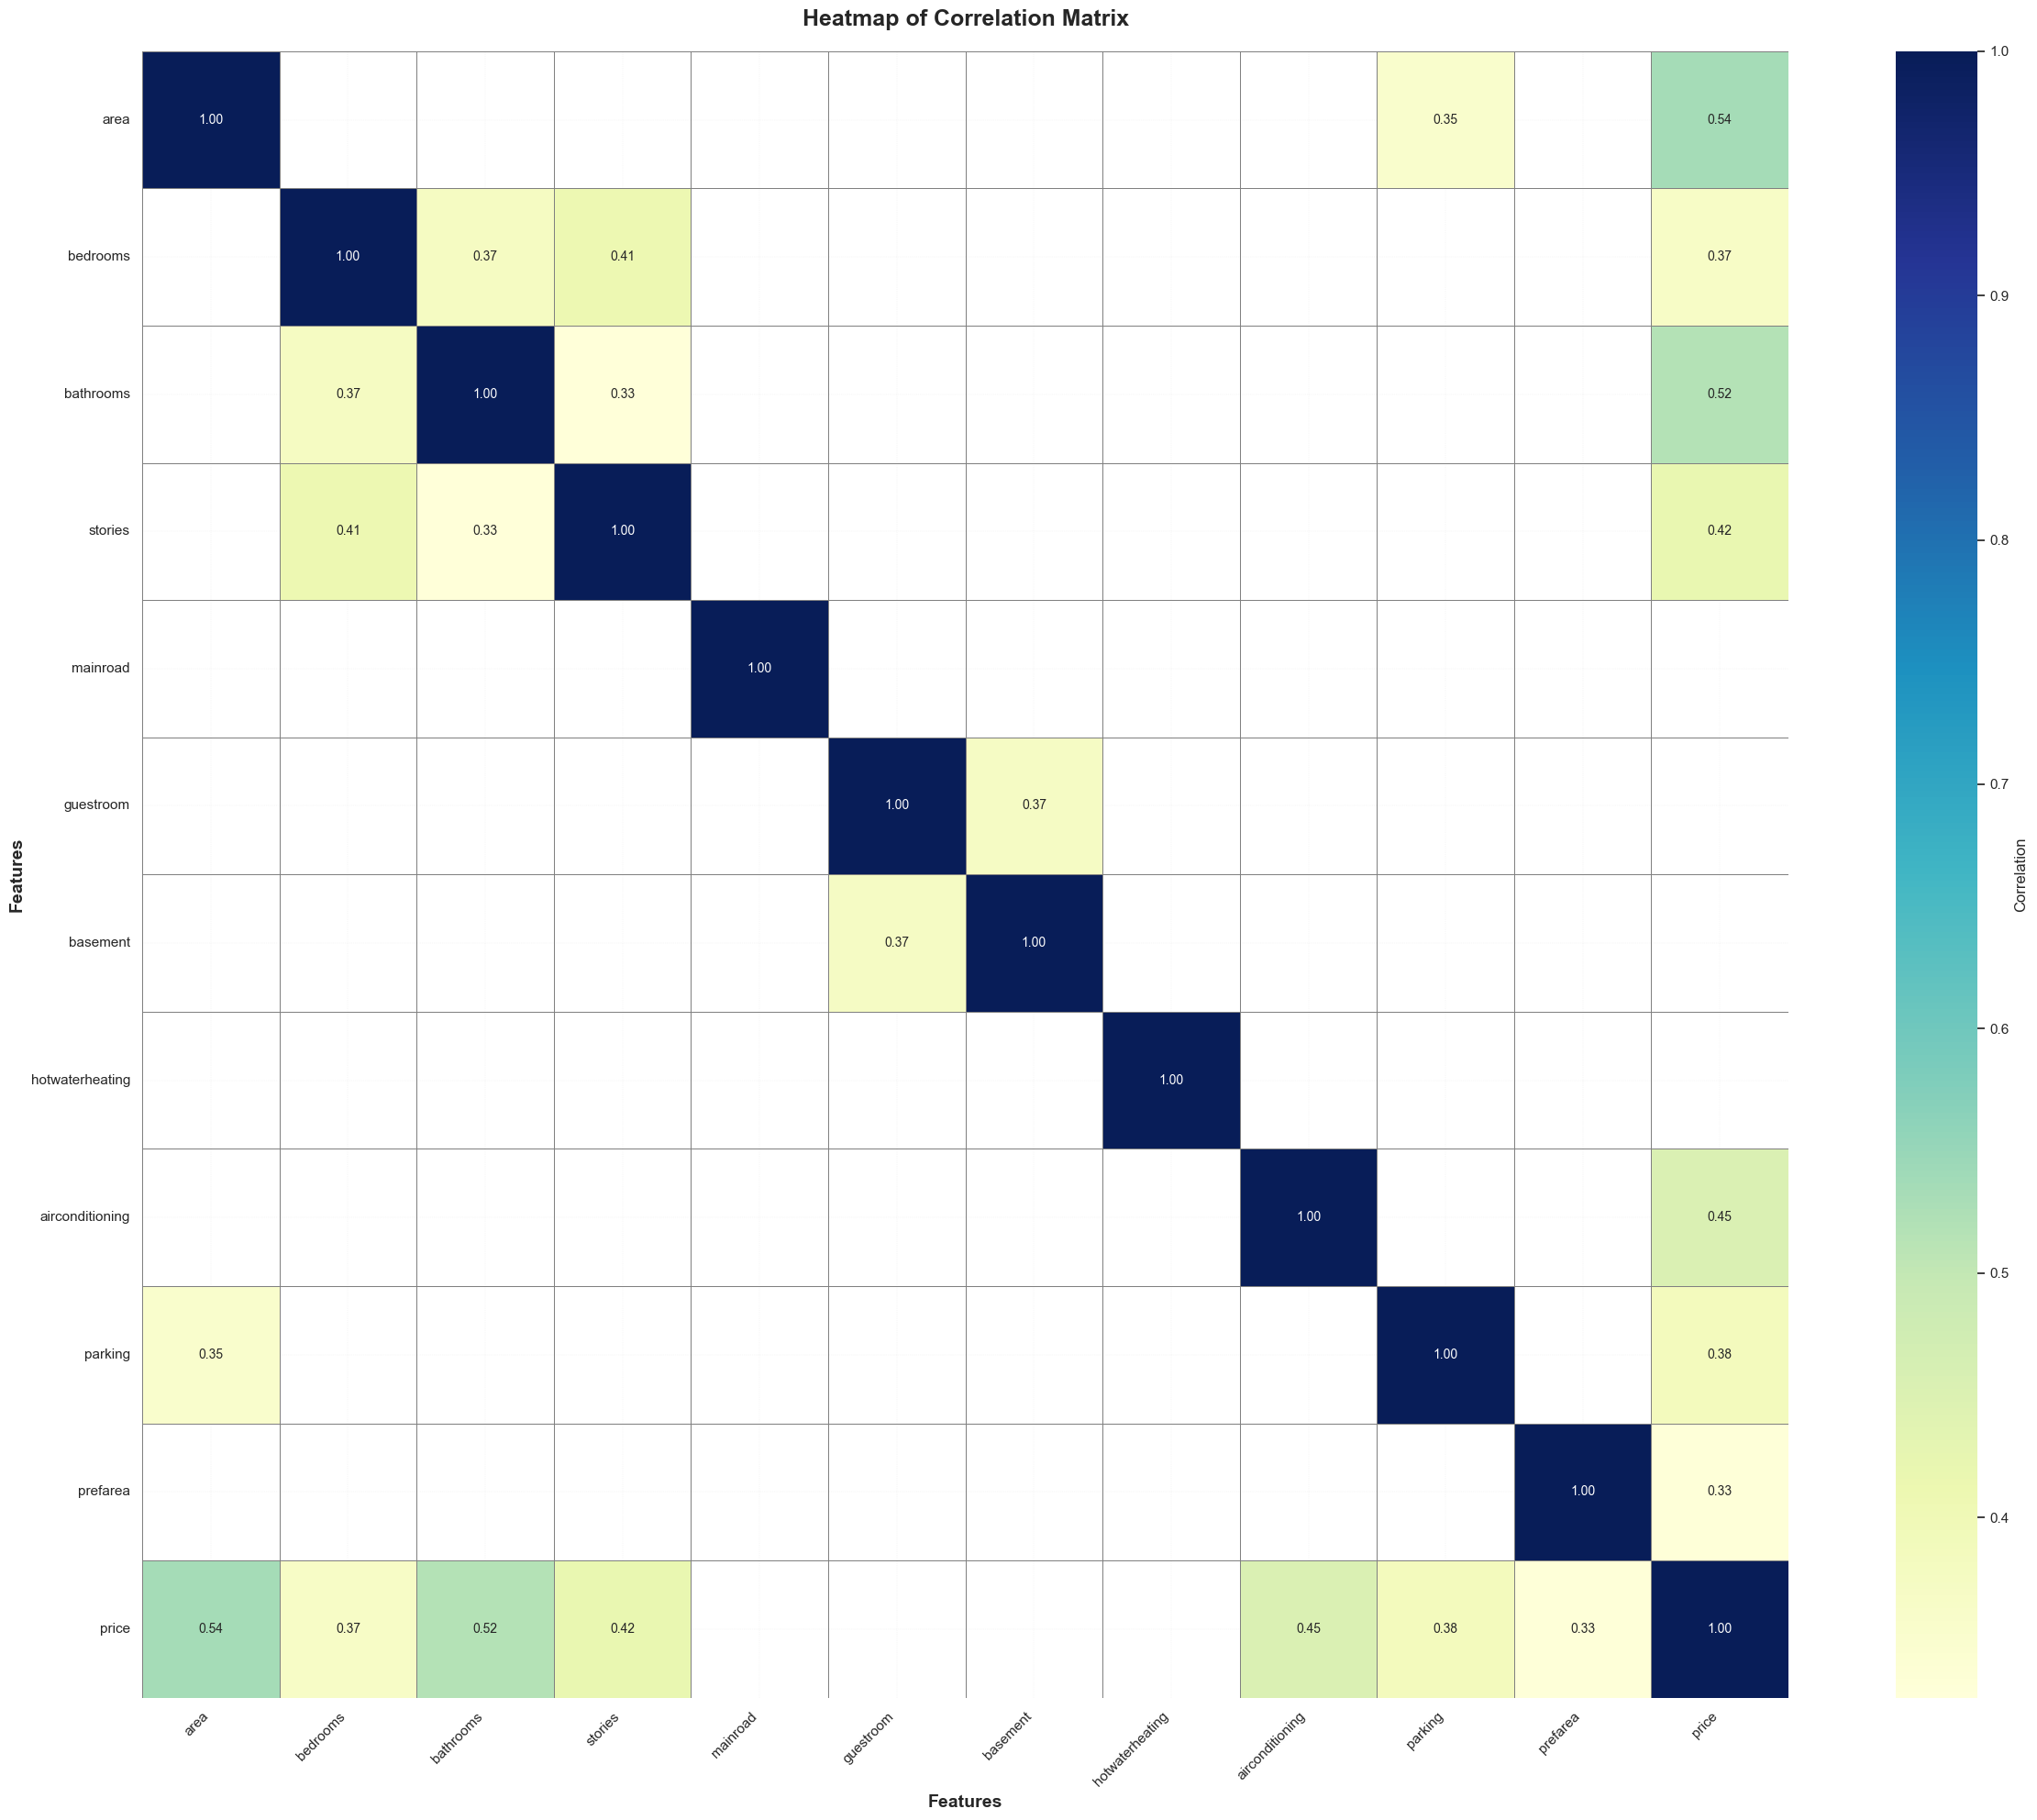

In [78]:
correlations = Heatmap_Correlation(df, mask=0.3, cmap="YlGnBu", adv_cmap=False, save_path=None, annot_size = 10, figsize=(25, 20))

# split data to x and y

In [79]:
x, y = get_x_y(df, target_column)

# Feature Selection

## Data Types and Corresponding Methods

### 1. Numerical Input and Numerical Output
#### Task: Regression
#### Methods: 
- SelectKBest, 
- SelectFdr, 
- SelectFwe, 
- SelectPercentile, 
- VarianceThreshold, 
- RFE, 
- RFECV, 
- SequentialFeatureSelector, 
- ExhaustiveFeatureSelector, 
- SelectFromModel, 
- TPOTRegressor, 
- Boruta, 
- InformationGain, 
- Lasso, 
- Ridge
#### Stat Methods: 
- f_regression, 
- mutual_info_regression, 
- pearsonr, 
- spearmanr, 
- kendalltau

### 2. Categorical Input and Numerical Output
#### Task: Regression
#### Methods:
- SelectKBest,
- SelectFdr,
- SelectFwe, 
- SelectPercentile,
- VarianceThreshold,
- RFE,
- RFECV,
- SequentialFeatureSelector,
- ExhaustiveFeatureSelector,
- SelectFromModel,
- TPOTRegressor,
- Boruta,
- InformationGain
#### Stat Methods:
- f_regression,
- mutual_info_regression

### 3. Numerical Input and Categorical Output
#### Task: Classification
#### Methods: 
- SelectKBest,
- SelectFdr,
- SelectFwe,
- SelectPercentile,
- VarianceThreshold,
- RFE,
- RFECV,
- SequentialFeatureSelector,
- ExhaustiveFeatureSelector,
- SelectFromModel,
- TPOTClassifier,
- Boruta,
- InformationGain
#### Stat Methods:
- chi2,
- f_classif,
- mutual_info_classif

### 4. Categorical Input and Categorical Output
#### Task: Classification
#### Methods:
- SelectKBest,
- SelectFdr,
- SelectFwe,
- SelectPercentile,
- VarianceThreshold,
- RFE,
- RFECV,
- SequentialFeatureSelector,
- ExhaustiveFeatureSelector,
- SelectFromModel,
- TPOTClassifier,
- Boruta,
- InformationGain
#### Stat Methods:
- chi2,
- f_classif,
- mutual_info_classif

### 5. Mixed Numerical and Categorical Input with Numerical Output
#### Task: Regression
#### Methods:
- RFE,
- RFECV,
- SequentialFeatureSelector,
- ExhaustiveFeatureSelector,
- SelectFromModel,
- TPOTRegressor,
- Boruta,

### 6. Mixed Numerical and Categorical Input with Categorical Output
#### Task: Classification
#### Methods:
- RFE,
- RFECV,
- SequentialFeatureSelector,
- ExhaustiveFeatureSelector,
- SelectFromModel,
- TPOTRegressor,
- Boruta,
- InformationGain,


## feature_selection def

In [80]:
# print(f'Number of columns before feature selection: {len(x.columns)}')
# print(f'Number of column can decrease it by using feature selection: between {len(x.columns) * 1/2} and {len(x.columns) * 2/3}')

# print(f'\ncolumns before feature selection: {x.columns}')

# num_col = x.select_dtypes(include=['int64', 'float64']).columns.tolist()
# print(f'\nNumerical columns before feature selection: {num_col}')

# cat_col = x.select_dtypes(exclude=['int64', 'float64']).columns.tolist()
# print(f'\nCategorical columns before feature selection: {cat_col}')

In [81]:
# x, FS_model, column_mapping = feature_selection(x, y, method='SelectKBest',n_features_to_select=16,k = 17, task= 'classification', n_jobs=-1)

In [82]:
# selected_mask_FS = FS_model.get_support()

# # Get selected and dropped columns
# selected_columns = x.columns[selected_mask_FS]
# dropped_columns = x.columns[~selected_mask_FS]

In [83]:
# print(f'Number of columns after feature selection: {len(x.columns)}')

# print(f'\ncolumns before feature selection: {x.columns}')

# num_col = x.select_dtypes(include=['int64', 'float64']).columns.tolist()
# print(f'\nNumerical columns after feature selection: {num_col}')

# cat_col = x.select_dtypes(exclude=['int64', 'float64']).columns.tolist()
# print(f'\nCategorical columns after feature selection: {cat_col}')

# df = pd.concat([x, y], axis=1)

# Data Encoding

In [84]:
df.select_dtypes(exclude=['int64', 'float64']).columns.tolist()

['furnishingstatus']

In [85]:
# ordinal_categories = df[''].value_counts().index.to_list()
# ordinal_categories

In [86]:
columns = ['furnishingstatus']

df = encode_column(df, columns = columns, method='get_dummies')

# df = encode_column(df, columns = 'City', method= 'label')
# df['City'] = df['City'].astype(float)

# ordinal_categories = df['CreditRating'].value_counts().index.to_list()
# df = encode_column(df, columns = 'CreditRating', method= 'ordinal', ordinal_categories=['1-Highest', '2-High', '3-Good', '4-Medium', '5-Low', '6-VeryLow', '7-Lowest'])

# df = encode_column(df, columns = '', method='target',target="")

# df.select_dtypes(exclude=['int64', 'float64']).columns.tolist()

Encoder for 'furnishingstatus' saved as 'furnishingstatus_OHE.pkl' in 'pickle/' folder.


In [87]:
len(df.columns)

14

## Make the target is last column

In [88]:
df = target_last_col(df, target_column)
df.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished,price
0,7420,4,2,3,1,1,1,1,1,2,1,0.0,0.0,13300000
1,8960,4,4,4,1,1,1,1,1,3,0,0.0,0.0,12250000
2,9960,3,2,2,1,1,0,1,0,2,1,1.0,0.0,12250000
3,7500,4,2,2,1,1,0,1,1,3,1,0.0,0.0,12215000
4,7420,4,1,2,1,0,0,1,1,2,0,0.0,0.0,11410000


# Get X , Y (TVT)

In [89]:
x,y = get_x_y(df,target_column)

In [90]:
x_train, y_train, x_valid, y_valid, x_test, y_test = get_x_y_TVT(df, target=target_column)

In [91]:
get_x_y_TVT_shape(x_train, y_train, x_valid, y_valid, x_test, y_test)

x_train shape = (383, 13)
x_valid shape = (53, 13)
x_test shape = (109, 13)
y_train shape = (383,)
y_valid shape = (53,)
y_test shape = (109,)


# Get train, valid and test data in same time

In [92]:
# df.columns.tolist()
# x_train , y_train ,x_valid , y_valid , x_test , y_test = train_valid_test_split(df , target='Churn Value',train_size=0.7,valid_size=0.1,test_size=0.2,random_state=42)
# get_x_y_TVT_shape(x_train, y_train, x_valid, y_valid , x_test, y_test)

# Scaling

In [93]:
x_train, x_valid, x_test, scaler = scale_data(x_train, x_valid, x_test)

x_scaler = scaler.transform(x)

Scaler saved to 'pickle/scaler.pkl'.


# Dimensionality Reduction

In [94]:
# print(len(df.columns))
# print(x_train.shape[1])

In [95]:
# x_train, x_test, x_valid, DR_model = dimensionality_reduction(
#     x_train=x_train, 
#     x_test=x_test, 
#     x_valid=x_valid, 
#     y_train=y_train, 
#     method= 'PCA', 
#     n_components=20
# )

# x = DR_model.transform(x)

# Train

In [96]:
models_names = ['XGBoost', 'RandomForest', 'LightGBM', 'CatBoost', 'Stacking']
models_values = [None, None, None, None, None]
have_overfitting = [None, None, None, None, None]

In [97]:
type_cross_valid = get_cross_validator(cv_type='KFold', cv=5)

type_CV_name = 'KFold'

scoring_type = 'neg_mean_squared_error'

## XGBoost

### Grid Search

In [98]:
xgb = XGBRegressor(random_state=42)

param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7, 10],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.8, 1.0, 1.2]
}

XGB_grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring=scoring_type,
    cv=type_cross_valid,
    verbose=2,
    n_jobs=-1
)

In [99]:
# Fit GridSearchCV
print("Starting GridSearchCV...")
XGB_grid_search.fit(x_train, y_train)

Starting GridSearchCV...
Fitting 5 folds for each of 3888 candidates, totalling 19440 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    inte...
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=42, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1.0, 1.2],
                         'gamma': [0, 0.1, 0.2],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7, 10],
                         'min_child_weight': [1, 3, 5],
                         'n_estimators': [50, 100, 200, 300],
                         'subsample': [0.6, 0.8, 1.0]},
             scoring='neg_mean_squared_error', verbose=2)

In [100]:
best_params = XGB_grid_search.best_params_
best_score = XGB_grid_search.best_score_
print('best_params =',best_params)
print('best_score =',best_score)

best_params = {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.2, 'max_depth': 3, 'min_child_weight': 3, 'n_estimators': 50, 'subsample': 0.6}
best_score = -1111122884201.7637


In [101]:
best_score = 0.9423334816071322

formatted_text = ', \n    '.join(
    f"{key} = '{value}'" if isinstance(value, str) else f"{key} = {value}"
    for key, value in best_params.items()
)
print(f'(\n    {formatted_text}\n)')

(
    colsample_bytree = 0.8, 
    gamma = 0, 
    learning_rate = 0.2, 
    max_depth = 3, 
    min_child_weight = 3, 
    n_estimators = 50, 
    subsample = 0.6
)


In [102]:
XGBoost_model = XGB_grid_search.best_estimator_
XGBoost_model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=3, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=50, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

### Normal Train

In [103]:
# XGBoost_model = XGBRegressor(
#     colsample_bytree=0.8,
#     gamma=0,
#     learning_rate=0.1,
#     max_depth=3,
#     min_child_weight=1,
#     n_estimators=100,
#     subsample=1.0,
#     random_state=42,
#     # reg_alpha=0.1,
#     # reg_lambda=1
# )

# XGBoost_model.fit(
#     x_train, y_train,
#     eval_set=[(x_valid, y_valid)],
#     early_stopping_rounds=20,
#     verbose=True
# )

### Top Features

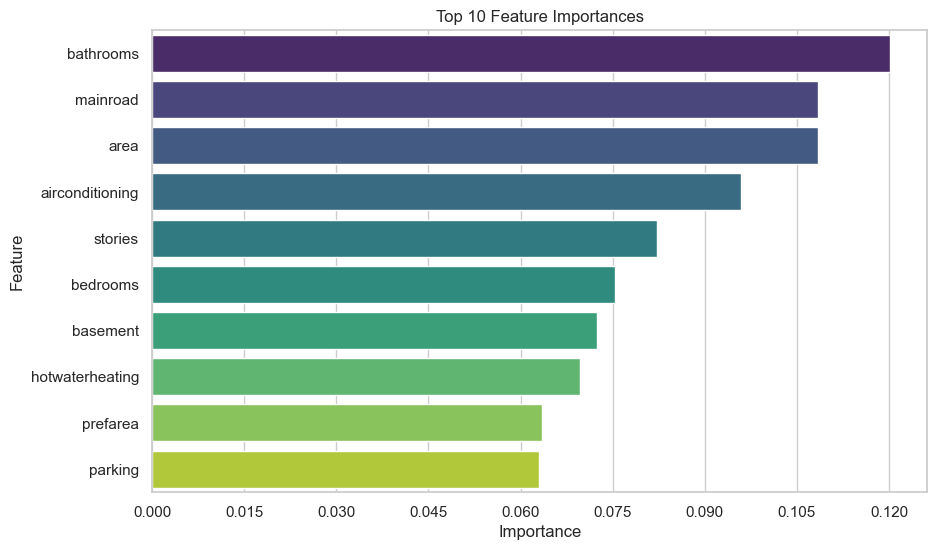

In [104]:
plot_feature_importance(XGBoost_model, x_train, x.columns, top_n='first')

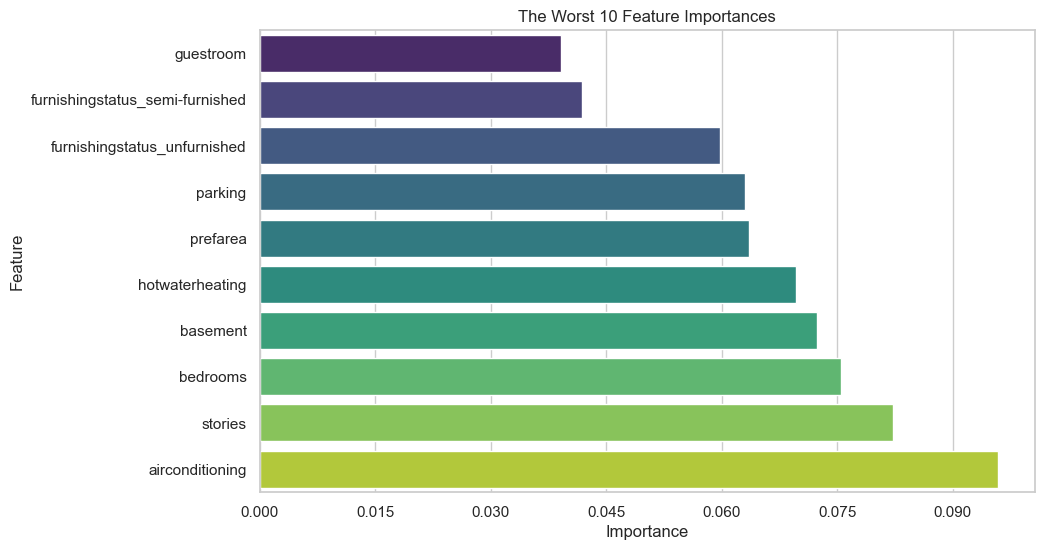

In [105]:
plot_feature_importance(XGBoost_model, x_train, x.columns, top_n='last')

### Check Overfitting

Mean Absolute Error (MAE):
Training MAE: 510539.3114
Validation MAE: 707755.4858

Mean Squared Error (MSE):
Training MSE: 491680157341.6170
Validation MSE: 847943059338.0554

Root Mean Squared Error (RMSE):
Training RMSE: 701199.0854
Validation RMSE: 920838.2373

R² Score:
Training R²: 0.8475
Validation R²: 0.5879

Cross-Validation (CV):
Cross-Validation Scores: [1.78578610e+12 1.40135535e+12 7.32468910e+11 9.40697636e+11
 1.39156730e+12]
Cross-Validation Mean Score: 1250375060818.0469


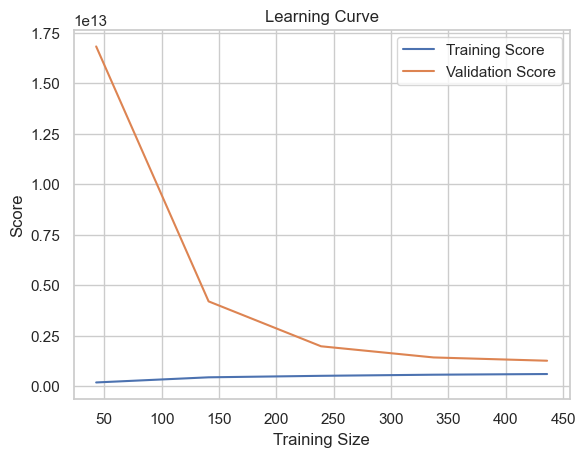

In [106]:
check_overfitting_regression(XGBoost_model, x_scaler, y, x_train, y_train, x_valid, y_valid, scoring_type, type_CV_name, 5, scoring_type)

In [107]:
have_overfitting[0] = 1 # if have overfitting add -1 if have small overfitting between(1% and 4%) add 0 if no overfitting add 1

### Get y_predict

In [108]:
y_pred = XGBoost_model.predict(x_test)

### Evaluate model

Mean Absolute Error (MAE) = 957205.1606
Mean Squared Error (MSE) = 1712097546895.3635
Root Mean Squared Error (RMSE) = 1308471.4544
R² Score = 0.6613


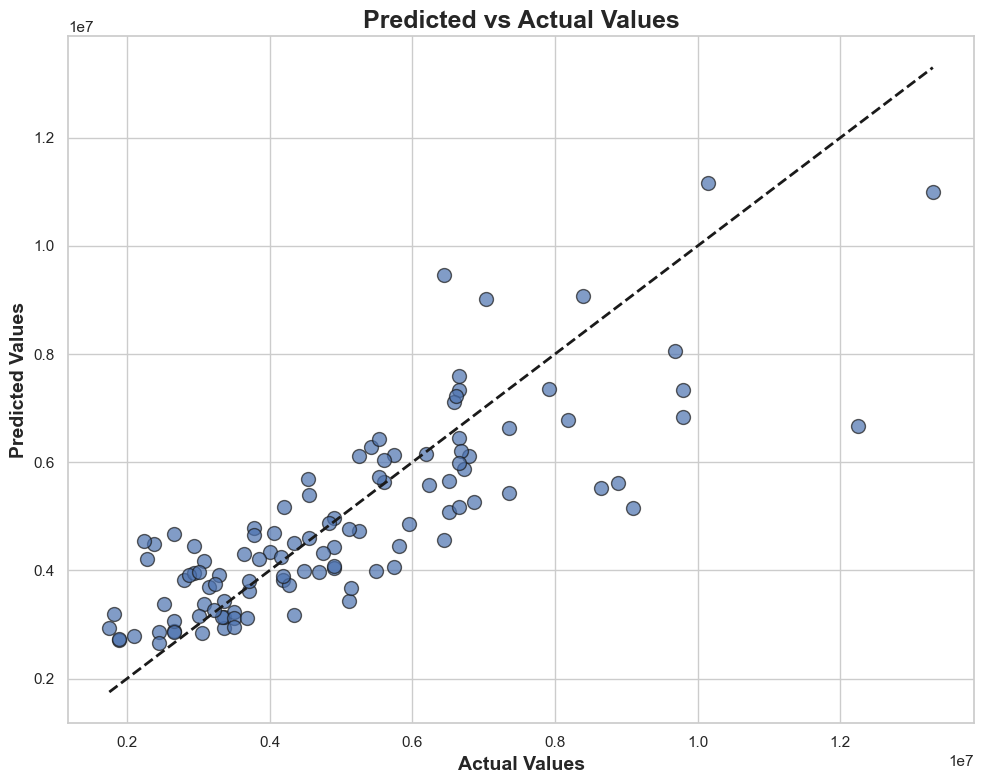

In [109]:
mae , mse, rmse, r2 = evaluate_model_regression(y_test, y_pred)
models_values[0] = [mae , mse, rmse, r2]

## Random Forest

### Grid Search

In [110]:
rf = RandomForestRegressor(random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

rf_grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring=scoring_type,
    cv=type_cross_valid,
    n_jobs=-1,
    verbose=2
)

In [111]:
# Fit GridSearchCV
print("Starting GridSearchCV...")
rf_grid_search.fit(x_train, y_train)

Starting GridSearchCV...
Fitting 5 folds for each of 135 candidates, totalling 675 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error', verbose=2)

In [112]:
best_params = rf_grid_search.best_params_
best_score = rf_grid_search.best_score_
print('best_params =',best_params)
print('best_score =',best_score)

best_params = {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
best_score = -1246761116753.4583


In [113]:
best_score = 0.937351588590851

formatted_text = ', \n    '.join(
    f"{key} = '{value}'" if isinstance(value, str) else f"{key} = {value}"
    for key, value in best_params.items()
)
print(f'(\n    {formatted_text}\n)')

(
    max_depth = 10, 
    min_samples_leaf = 4, 
    min_samples_split = 2, 
    n_estimators = 100
)


In [114]:
RF_model = rf_grid_search.best_estimator_
RF_model

RandomForestRegressor(max_depth=10, min_samples_leaf=4, random_state=42)

### Normal Train

In [115]:
# RF_model = RandomForestRegressor(
#     max_depth=20,
#     min_samples_leaf=2,
#     min_samples_split=10,
#     n_estimators=100,
#     random_state=42,
#     max_features='sqrt'
# )

# RF_model.fit(x_train, y_train)

### Top Features

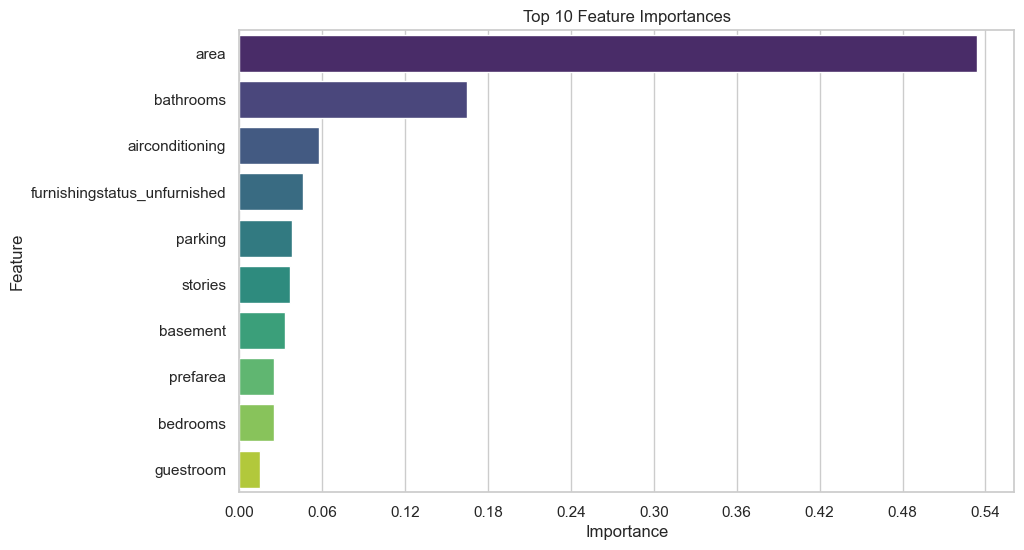

In [116]:
plot_feature_importance(RF_model, x_train, x.columns, top_n='first')

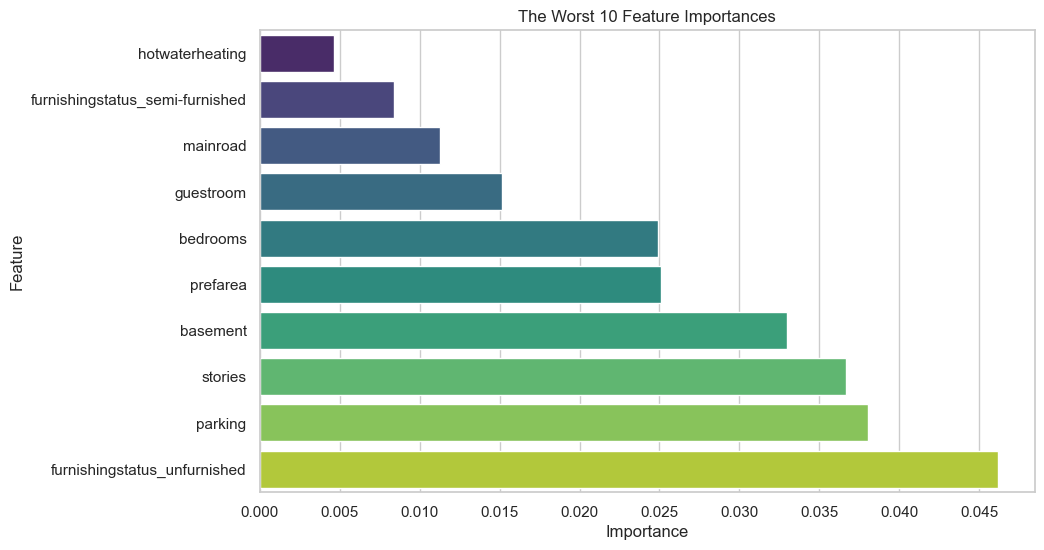

In [117]:
plot_feature_importance(RF_model, x_train, x.columns, top_n='last')

### Check Overfitting

Mean Absolute Error (MAE):
Training MAE: 564885.0933
Validation MAE: 698672.4477

Mean Squared Error (MSE):
Training MSE: 678023492989.6384
Validation MSE: 847529954912.4377

Root Mean Squared Error (RMSE):
Training RMSE: 823421.8196
Validation RMSE: 920613.9011

R² Score:
Training R²: 0.7896
Validation R²: 0.5881

Cross-Validation (CV):
Cross-Validation Scores: [2.02540118e+12 1.44249795e+12 7.11498452e+11 9.98030154e+11
 1.27214495e+12]
Cross-Validation Mean Score: 1289914539076.5701


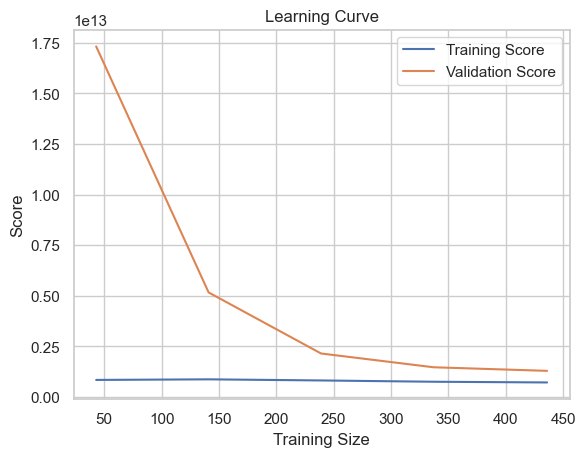

In [118]:
check_overfitting_regression(RF_model, x_scaler, y, x_train, y_train, x_valid, y_valid, scoring_type, type_CV_name, 5, scoring_type)

In [119]:
have_overfitting[1] = 0 # if have overfitting add -1 if have small overfitting between(1% and 4%) add 0 if no overfitting add 1

### Get y_predict

In [120]:
y_pred = RF_model.predict(x_test)

### Evaluate model

Mean Absolute Error (MAE) = 1097047.4592
Mean Squared Error (MSE) = 2117149979450.0325
Root Mean Squared Error (RMSE) = 1455042.9476
R² Score = 0.5811


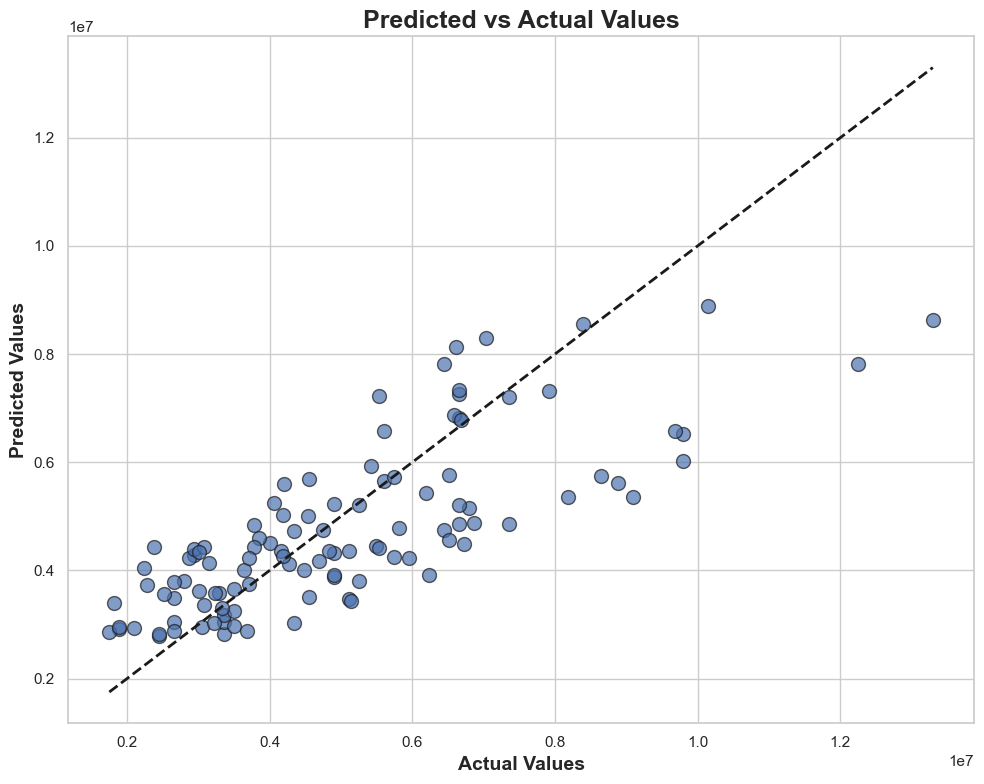

In [121]:
mae , mse, rmse, r2 = evaluate_model_regression(y_test, y_pred)
models_values[1] = [mae , mse, rmse, r2]

## LightGBM

### Grid Search

In [122]:
# lgb = LGBMRegressor(random_state=42)

# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'learning_rate': [0.01, 0.1, 0.2],
#     'max_depth': [-1, 5, 10],
#     'subsample': [0.8, 1.0],
#     'colsample_bytree': [0.8, 1.0],
#     'reg_alpha': [0, 0.1, 0.5],
#     'reg_lambda': [0.5, 1, 2]
# }

# lgb_grid_search = GridSearchCV(
#     estimator=lgb,
#     param_grid=param_grid,
#     scoring=scoring_type,
#     cv=type_cross_valid,
#     n_jobs=-1,
#     verbose=2
# )

In [123]:
# # Fit GridSearchCV
# print("Starting GridSearchCV...")
# lgb_grid_search.fit(x_train, y_train)

Starting GridSearchCV...
Fitting 5 folds for each of 972 candidates, totalling 4860 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000260 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 137
[LightGBM] [Info] Number of data points in the train set: 383, number of used features: 13
[LightGBM] [Info] Start training from score 4690198.668407
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive

  File "c:\Users\PC\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=LGBMRegressor(random_state=42), n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1.0],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [-1, 5, 10],
                         'n_estimators': [50, 100, 200],
                         'reg_alpha': [0, 0.1, 0.5], 'reg_lambda': [0.5, 1, 2],
                         'subsample': [0.8, 1.0]},
             scoring='neg_mean_squared_error', verbose=2)

In [124]:
# best_params = lgb_grid_search.best_params_
# best_score = lgb_grid_search.best_score_
# print('best_params =',best_params)
# print('best_score =',best_score)

best_params = {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': -1, 'n_estimators': 50, 'reg_alpha': 0.5, 'reg_lambda': 2, 'subsample': 0.8}
best_score = -1161151897274.2349


In [125]:
# best_score = 0.939036935795931

# formatted_text = ', \n    '.join(
#     f"{key} = '{value}'" if isinstance(value, str) else f"{key} = {value}"
#     for key, value in best_params.items()
# )
# print(f'(\n    {formatted_text}\n)')

(
    colsample_bytree = 0.8, 
    learning_rate = 0.1, 
    max_depth = -1, 
    n_estimators = 50, 
    reg_alpha = 0.5, 
    reg_lambda = 2, 
    subsample = 0.8
)


In [126]:
# lgb_model = lgb_grid_search.best_estimator_
# lgb_model

LGBMRegressor(colsample_bytree=0.8, n_estimators=50, random_state=42,
              reg_alpha=0.5, reg_lambda=2, subsample=0.8)

### Normal Train

In [137]:
lgb_model = LGBMRegressor(
    colsample_bytree=0.8,
    learning_rate=0.1,
    max_depth=-1,
    n_estimators=50,
    reg_alpha=0.5,
    reg_lambda=2,
    subsample=0.8,
    min_child_samples=20,
    random_state=42,
)

# Fit the model with callbacks for early stopping
lgb_model.fit(
    x_train, y_train,
    eval_set=[(x_valid, y_valid)],
    eval_metric='nmse',
    callbacks=[early_stopping(50)],  # Use the LightGBM early_stopping callback
)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000192 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 137
[LightGBM] [Info] Number of data points in the train set: 383, number of used features: 13
[LightGBM] [Info] Start training from score 4690198.668407
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 50 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Ligh

LGBMRegressor(colsample_bytree=0.8, n_estimators=50, random_state=42,
              reg_alpha=0.5, reg_lambda=2, subsample=0.8)

### Top Features

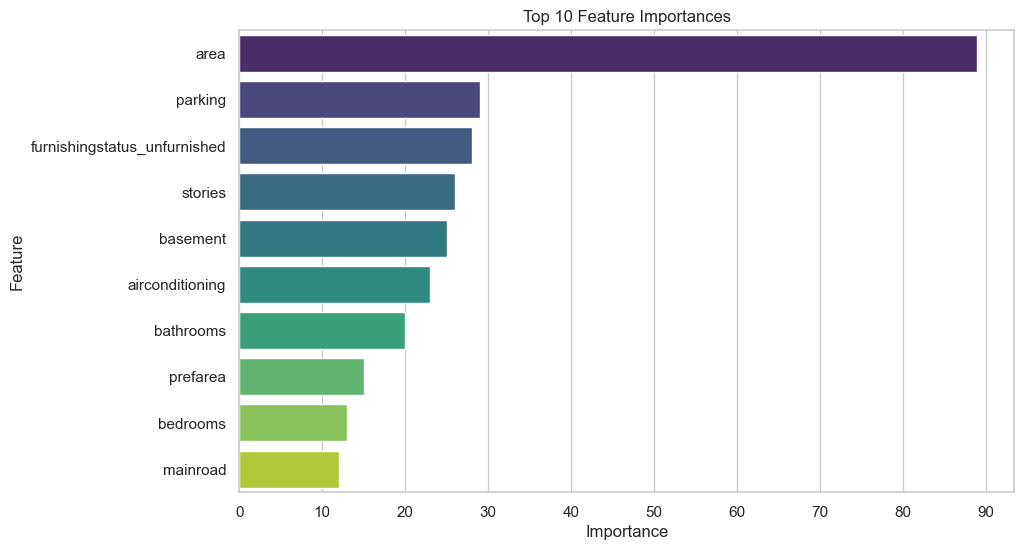

In [138]:
plot_feature_importance(lgb_model, x_train, x.columns, top_n='first')

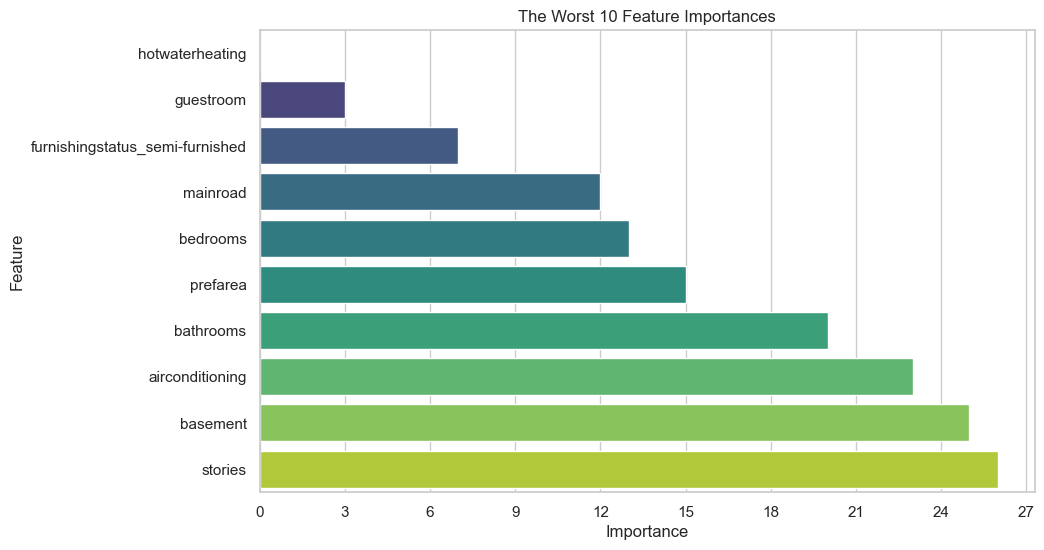

In [139]:
plot_feature_importance(lgb_model, x_train, x.columns, top_n='last')

### Check Overfitting

Mean Absolute Error (MAE):
Training MAE: 661062.8297
Validation MAE: 723873.7272

Mean Squared Error (MSE):
Training MSE: 919201732112.0867
Validation MSE: 891684963605.2407

Root Mean Squared Error (RMSE):
Training RMSE: 958750.0885
Validation RMSE: 944290.7199

R² Score:
Training R²: 0.7148
Validation R²: 0.5667

Cross-Validation (CV):
Cross-Validation Scores: [1.89227479e+12 1.38235186e+12 6.82950008e+11 8.78245634e+11
 1.36762863e+12]
Cross-Validation Mean Score: 1240690183546.7273


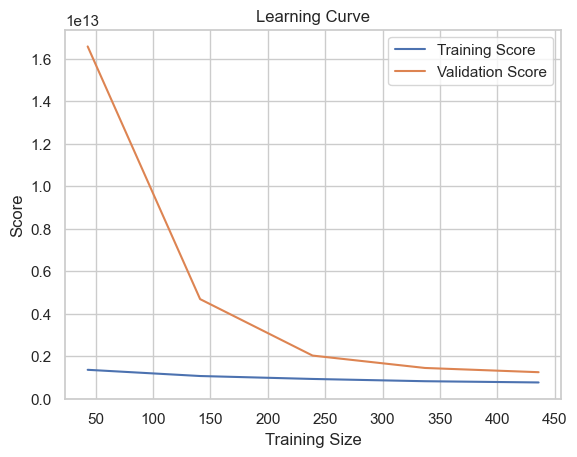

In [140]:
check_overfitting_regression(lgb_model, x_scaler, y, x_train, y_train, x_valid, y_valid, scoring_type, type_CV_name, 5, scoring_type)

In [141]:
have_overfitting[2] = 1 # if have overfitting add -1 if have small overfitting between(1% and 4%) add 0 if no overfitting add 1

### Get y_predict

In [142]:
y_pred = lgb_model.predict(x_test)

### Evaluate model

Mean Absolute Error (MAE) = 1090359.8057
Mean Squared Error (MSE) = 2221676615318.2354
Root Mean Squared Error (RMSE) = 1490528.9716
R² Score = 0.5605


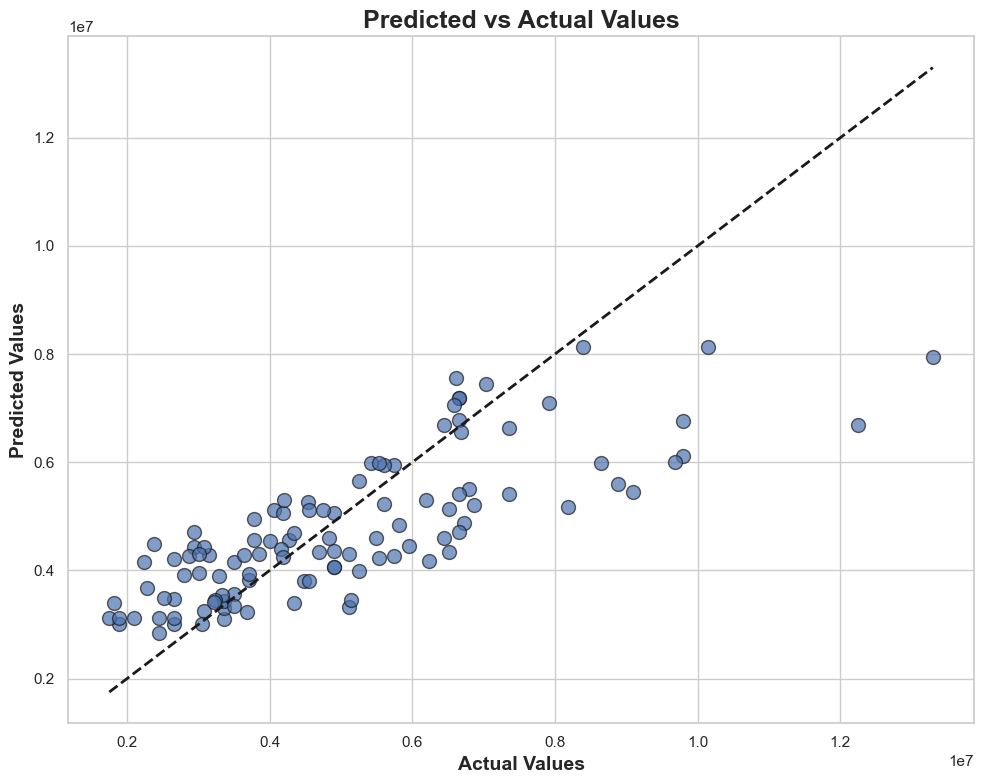

In [143]:
mae , mse, rmse, r2 = evaluate_model_regression(y_test, y_pred)
models_values[2] = [mae , mse, rmse, r2]

## CatBoost

### Grid Search

In [144]:
catboost = CatBoostRegressor(
    verbose=0,
    random_state=42,
    allow_writing_files=False  # Prevents the creation of the catboost_info folder
)

param_grid = {
    'iterations': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'depth': [4, 6, 8],
    'l2_leaf_reg': [3, 5, 7]
}

catboost_grid_search = GridSearchCV(
    estimator=catboost,
    param_grid=param_grid,
    scoring=scoring_type,
    cv=type_cross_valid,
    n_jobs=-1,
    verbose=2
)

In [145]:
# Fit GridSearchCV
print("Starting GridSearchCV...")
catboost_grid_search.fit(x_train, y_train)

Starting GridSearchCV...
Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=<catboost.core.CatBoostRegressor object at 0x00000142B73B0990>,
             n_jobs=-1,
             param_grid={'depth': [4, 6, 8], 'iterations': [100, 200, 300],
                         'l2_leaf_reg': [3, 5, 7],
                         'learning_rate': [0.01, 0.1, 0.2]},
             scoring='neg_mean_squared_error', verbose=2)

In [146]:
best_params = catboost_grid_search.best_params_
best_score = catboost_grid_search.best_score_
print('best_params =',best_params)
print('best_score =',best_score)

best_params = {'depth': 4, 'iterations': 200, 'l2_leaf_reg': 7, 'learning_rate': 0.1}
best_score = -1145724655698.893


In [147]:
best_score = 0.9378956724090785

formatted_text = ', \n    '.join(
    f"{key} = '{value}'" if isinstance(value, str) else f"{key} = {value}"
    for key, value in best_params.items()
)
print(f'(\n    {formatted_text}\n)')

(
    depth = 4, 
    iterations = 200, 
    l2_leaf_reg = 7, 
    learning_rate = 0.1
)


In [148]:
catboost_model = catboost_grid_search.best_estimator_
catboost_model

### Normal Train

In [149]:
# catboost_model = CatBoostRegressor(
#     depth=6,
#     iterations=100,
#     l2_leaf_reg=7,
#     learning_rate=0.1,
#     allow_writing_files=False,
#     verbose=0,
#     random_state=42
# )

# catboost_model.fit(
#     x_train, 
#     y_train, 
#     eval_set=(x_valid, y_valid), 
#     # cat_features=categorical_features_indices  # if you have categorical features
# )

### Top Features

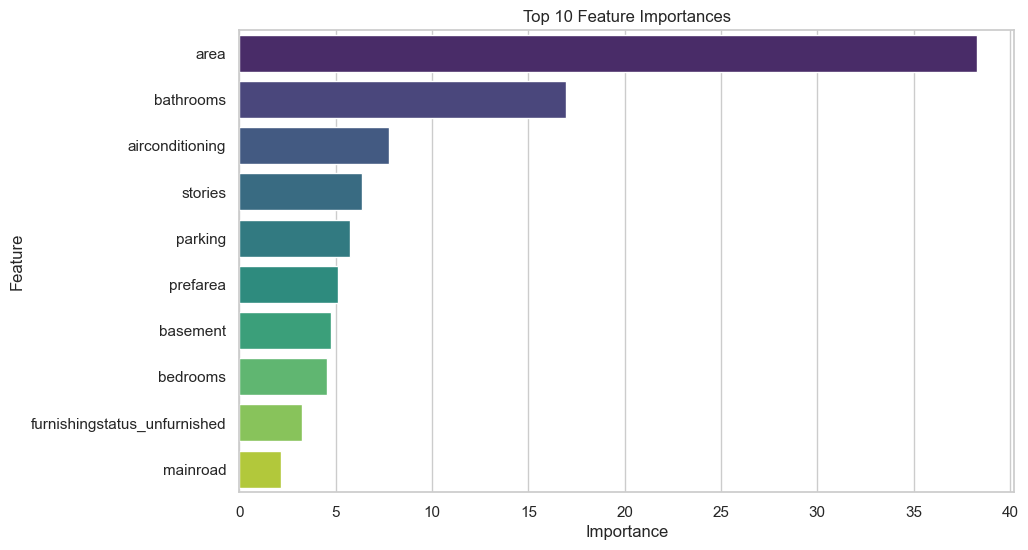

In [150]:
plot_feature_importance(catboost_model, x_train, x.columns, top_n='first')

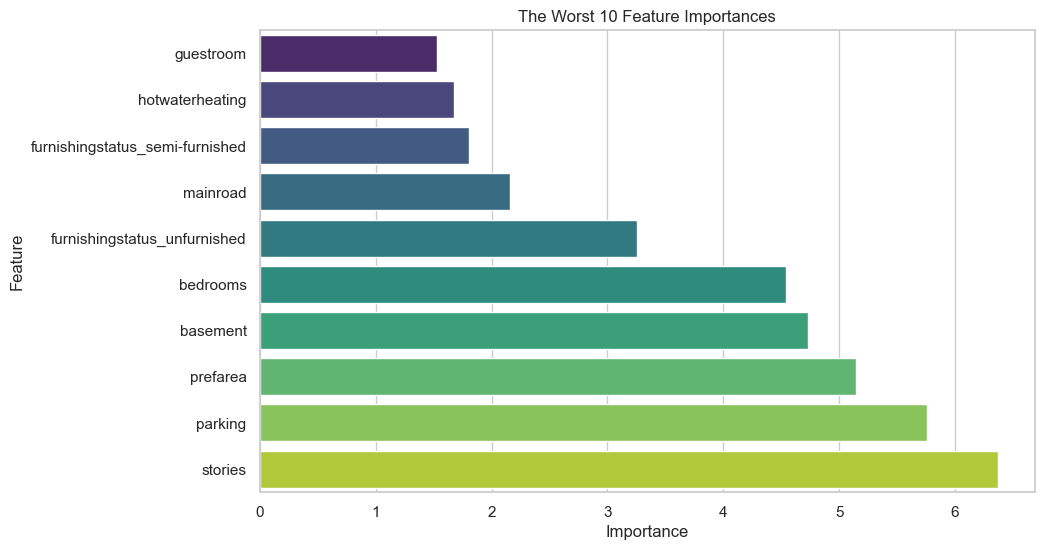

In [151]:
plot_feature_importance(catboost_model, x_train, x.columns, top_n='last')

### Check Overfitting

Mean Absolute Error (MAE):
Training MAE: 532370.2915
Validation MAE: 711897.0803

Mean Squared Error (MSE):
Training MSE: 505567078165.8885
Validation MSE: 869310851244.5942

Root Mean Squared Error (RMSE):
Training RMSE: 711032.4030
Validation RMSE: 932368.4096

R² Score:
Training R²: 0.8431
Validation R²: 0.5775

Cross-Validation (CV):
Cross-Validation Scores: [1.80326564e+12 1.31311327e+12 7.93674143e+11 8.83667825e+11
 1.35106905e+12]
Cross-Validation Mean Score: 1228957984208.8191


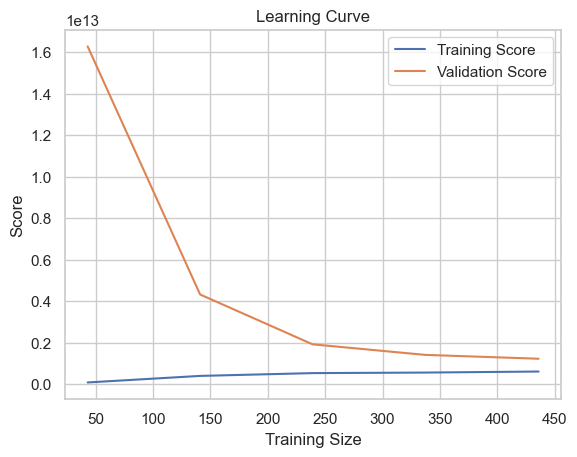

In [152]:
check_overfitting_regression(catboost_model, x_scaler, y, x_train, y_train, x_valid, y_valid, scoring_type, type_CV_name, 5, scoring_type)

In [153]:
have_overfitting[3] = 0 # if have overfitting add -1 if have small overfitting between(1% and 4%) add 0 if no overfitting add 1

### Get y_predict

In [154]:
y_pred = catboost_model.predict(x_test)

### Evaluate model

Mean Absolute Error (MAE) = 998512.2036
Mean Squared Error (MSE) = 1810090744659.4912
Root Mean Squared Error (RMSE) = 1345396.1293
R² Score = 0.6419


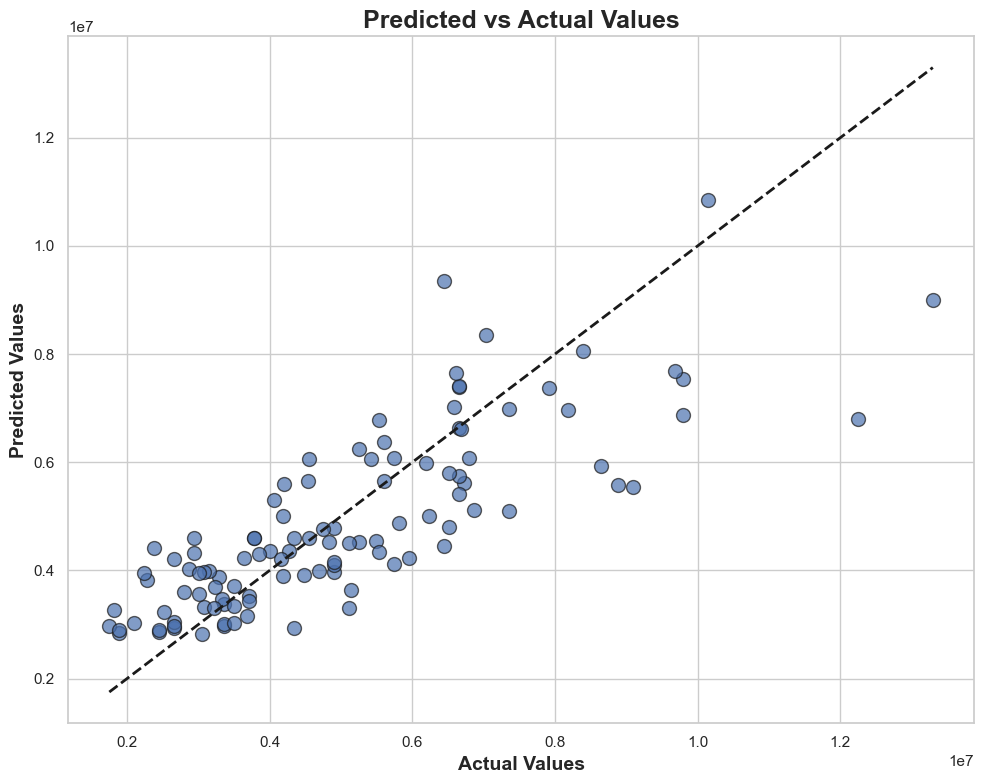

In [155]:
mae , mse, rmse, r2 = evaluate_model_regression(y_test, y_pred)
models_values[3] = [mae , mse, rmse, r2]

## Stacking_model

In [156]:
xgboost = XGBRegressor(
    colsample_bytree=0.8,
    gamma=0,
    learning_rate=0.1,
    max_depth=3,
    min_child_weight=1,
    n_estimators=100,
    subsample=1.0,
    random_state=42,
    # reg_alpha=0.1,
    # reg_lambda=1
)

random_forest = RandomForestRegressor(
    max_depth=20,
    min_samples_leaf=2,
    min_samples_split=10,
    n_estimators=100,
    random_state=42,
    max_features='sqrt'
)

lightgb = LGBMRegressor(
    colsample_bytree=0.8,
    learning_rate=0.1,
    max_depth=5,
    n_estimators=50,
    subsample=0.8,
    random_state=42,
    # reg_alpha=0.1,
    # reg_lambda=0.5,
    # min_child_samples=20
)

catboost = CatBoostRegressor(
    depth=6,
    iterations=100,
    l2_leaf_reg=7,
    learning_rate=0.1,
    allow_writing_files=False,
    verbose=0,
    random_state=42
)

voting_classifier =[('xgb', xgboost), ('rf', random_forest), ('lgb', lightgb), ('catboost', catboost)]

# Final estimator for overfitting scenario
final_estimator = Ridge(alpha=1.0)  # Regularized mode

# Final estimator for no-overfitting scenario
final_estimator = XGBRegressor(
    learning_rate=0.05,
    n_estimators=100,
    max_depth=3,
    reg_alpha=0.1,
    reg_lambda=0.1
)  # Light boosting model

In [157]:
Stacking_model = StackingRegressor(
    estimators=voting_classifier, 
    final_estimator=final_estimator,
    cv=type_cross_valid, 
    # stack_method='predict_proba',  # Use probabilities for better generalization
)

Stacking_model.fit(x_train, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000131 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 137
[LightGBM] [Info] Number of data points in the train set: 383, number of used features: 13
[LightGBM] [Info] Start training from score 4690198.668407
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

StackingRegressor(cv=KFold(n_splits=5, random_state=42, shuffle=True),
                  estimators=[('xgb',
                               XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=0.8, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=0,
                                            grow_policy=None,
                                            importance_type...
                                               feature_types=None, gamma=None,
                                               grow_policy=None,
                                               importance_type=None,
                                               interaction_constraints=None,
                                               learning_rate=0.05, max_bin=None,
                                               max_cat_threshold=None,
                                               max_cat_to_onehot=None,
                                               max_delta_step=None, max_depth=3,
                                               max_leaves=None,
                                               min_child_weight=None,
                                               missing=nan,
                                               monotone_constraints=None,
                                               multi_strategy=None,
                                               n_estimators=100, n_jobs=None,
                                               num_parallel_tree=None,
                                               random_state=None, ...))

### Check Overfitting

Mean Absolute Error (MAE):
Training MAE: 605586.3381
Validation MAE: 722131.4340

Mean Squared Error (MSE):
Training MSE: 740185421501.2379
Validation MSE: 859664864036.8208

Root Mean Squared Error (RMSE):
Training RMSE: 860340.2940
Validation RMSE: 927181.1387

R² Score:
Training R²: 0.7704
Validation R²: 0.5822

Cross-Validation (CV):
Cross-Validation Scores: [1.96759191e+12 1.52721404e+12 7.43584057e+11 8.53821864e+11
 1.39773004e+12]
Cross-Validation Mean Score: 1297988381750.5310


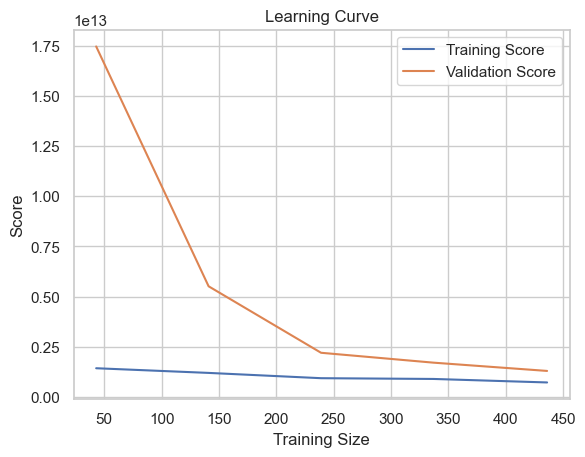

In [158]:
check_overfitting_regression(Stacking_model, x_scaler, y, x_train, y_train, x_valid, y_valid, scoring_type, type_CV_name, 5, scoring_type)

In [159]:
have_overfitting[4] = 0 # if have overfitting add -1 if have small overfitting between(1% and 4%) add 0 if no overfitting add 1

### Get y_predict

In [160]:
y_pred = Stacking_model.predict(x_test)

### Evaluate model

Mean Absolute Error (MAE) = 1034659.0894
Mean Squared Error (MSE) = 1961025958560.6646
Root Mean Squared Error (RMSE) = 1400366.3658
R² Score = 0.6120


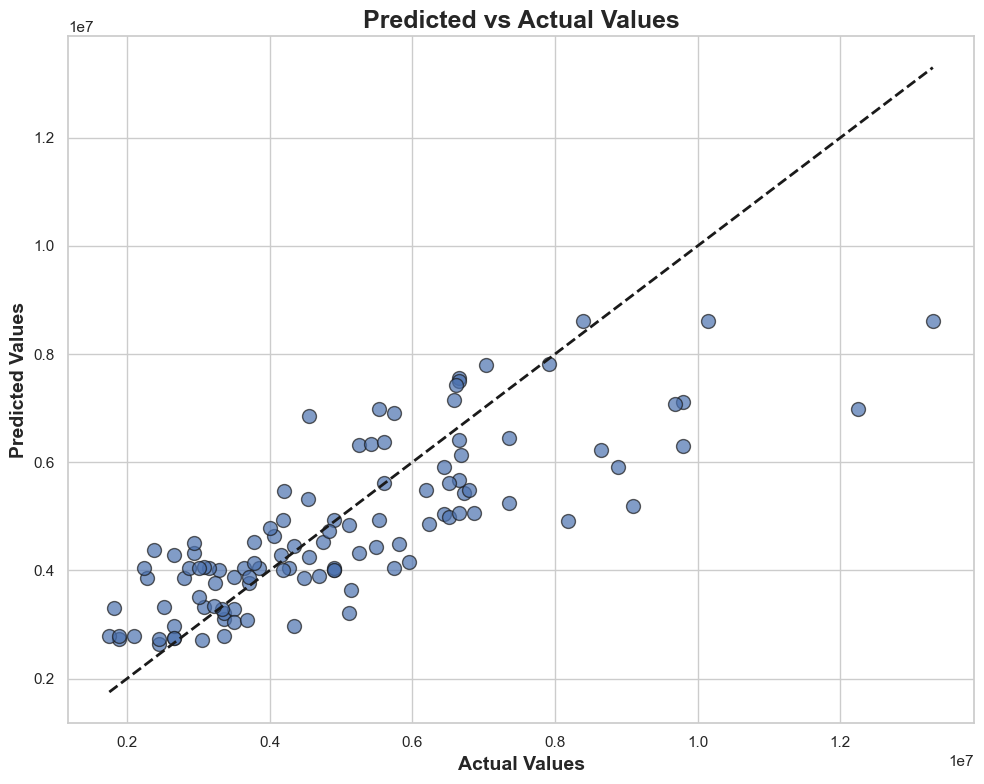

In [161]:
mae , mse, rmse, r2 = evaluate_model_regression(y_test, y_pred)
models_values[4] = [mae , mse, rmse, r2]

# save and load the models

## Save the models

In [165]:
# Create a directory to store the pickle files
output_folder = "pickle/models"
os.makedirs(output_folder, exist_ok=True)

# Define the models
models = {
    "XGBoost_model": XGBoost_model,
    "RF_model": RF_model,
    "lgb_model": lgb_model,
    "catboost_model": catboost_model,
    "Stacking_model": Stacking_model
}

# Save each model to a separate pickle file
for model_name, model_object in models.items():
    filepath = os.path.join(output_folder, f"{model_name}.pkl")
    with open(filepath, "wb") as file:
        pickle.dump(model_object, file)
    print(f"Model '{model_name}' saved to '{filepath}'.")


Model 'XGBoost_model' saved to 'pickle/models\XGBoost_model.pkl'.
Model 'RF_model' saved to 'pickle/models\RF_model.pkl'.
Model 'lgb_model' saved to 'pickle/models\lgb_model.pkl'.
Model 'catboost_model' saved to 'pickle/models\catboost_model.pkl'.
Model 'Stacking_model' saved to 'pickle/models\Stacking_model.pkl'.


## load the models

In [166]:
# # Load all models from the pickle folder
# loaded_models = {}

# for model_name in models.keys():
#     filepath = os.path.join(output_folder, f"{model_name}.pkl")
#     with open(filepath, "rb") as file:
#         loaded_models[model_name] = pickle.load(file)
#         print(f"Model '{model_name}' loaded from '{filepath}'.")

# # Access each loaded model
# XGBoost_model_loaded = loaded_models["XGBoost_model"]
# RF_model_loaded = loaded_models["RF_model"]
# lgb_model_loaded = loaded_models["lgb_model"]
# catboost_model_loaded = loaded_models["catboost_model"]


# compare between the models

In [169]:
models_names = ['XGBoost', 'RandomForest', 'LightGBM', 'CatBoost', 'Stacking']
evaluate_names = ['mae' , 'mse', 'rmse', 'r2']

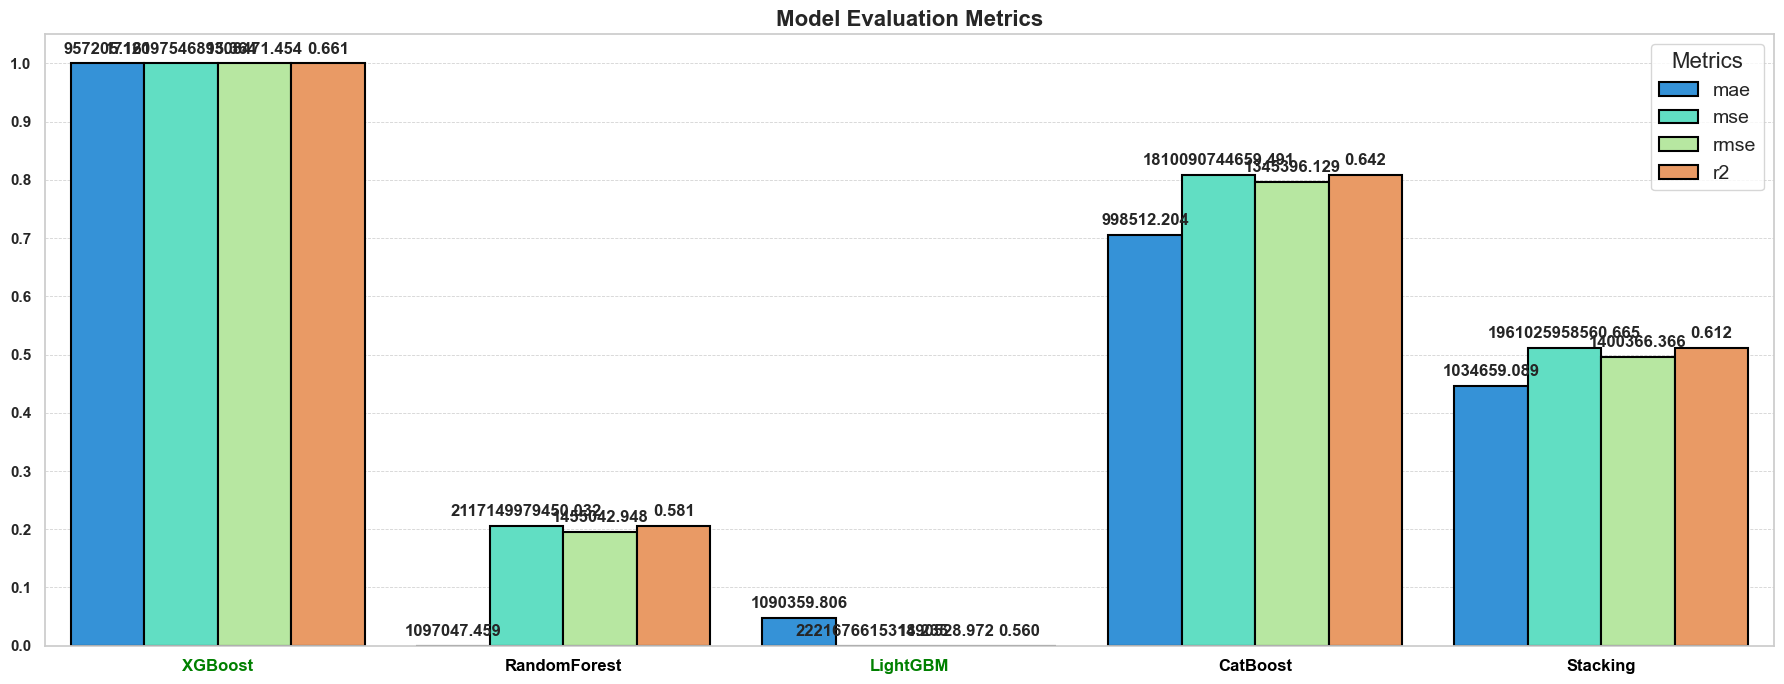

In [224]:
plots_evaluate_models_regression(
    models_values, 
    models_names, 
    evaluate_names,
    have_overfitting,
    palette='rainbow',
    title='Model Evaluation Metrics',
    figsize=(18, 7),
    width=0.85,
    annote_num = 3
)

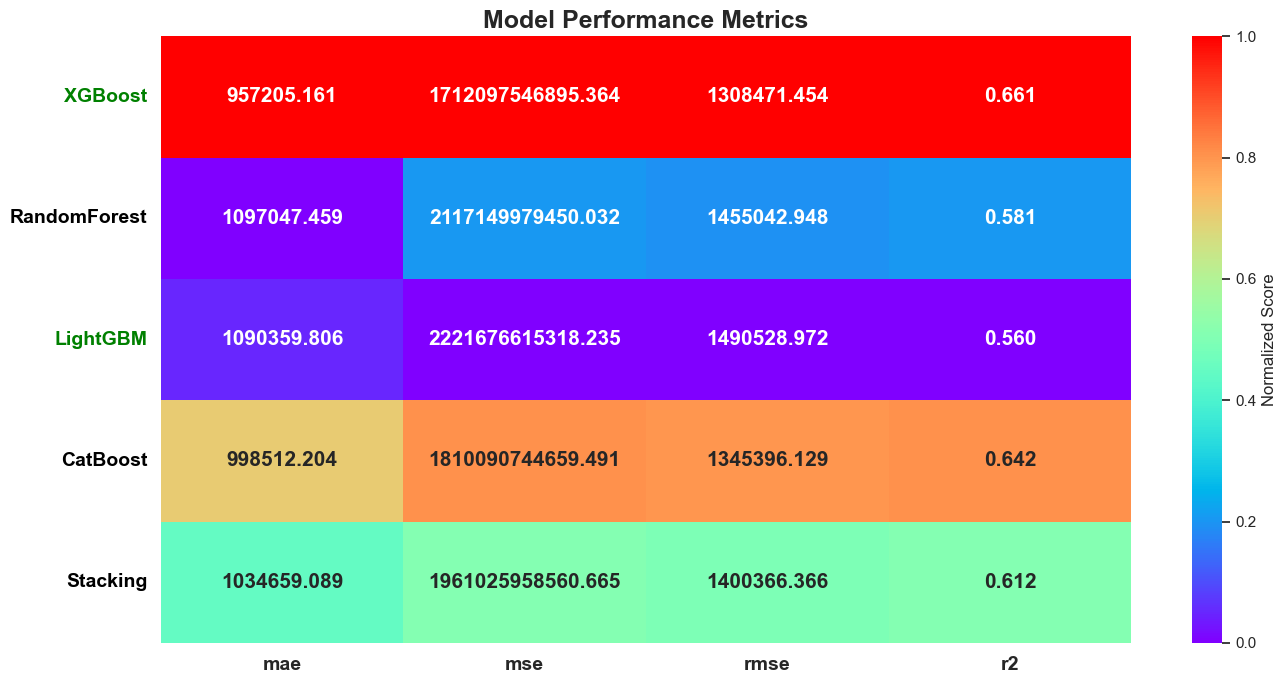

In [215]:
plot_model_performance(
    models_values, 
    models_names, 
    evaluate_names, 
    have_overfitting,
    metrics_type = 'regression',
    cmap='rainbow',
    x_rotation=0)